# Reto Kaggle - Titanic classification

**Team's name:** *AI's Daemons*\
**Team's members:**
- Cristobal Eleazar Meza (A01661792)
- Ricardo Campos Luna (A01656898)
- Diego Esteban Zepeda Ceballos (A01026512)

### Step 1: Check the data

In [1]:
%pip install tensorflow

In [2]:
%pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [3]:
import kerastuner as kt
import matplotlib.pyplot as plt # plot
import numpy as np # math, arrays
import pandas as pd # table manipulation
import plotly.express as px
import seaborn as sns # visualization
import tensorflow as tf
import warnings # maybe warnings
warnings.filterwarnings('ignore')

<ipython-input-3-3e706bab065b>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [4]:
from numpy import asarray
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


**Challenge**: Titanic Dataset


**Objective**: Check Reasons for survival, predict who is more likely to survive within the Titanic Conditions or features available

**Hypothesis:** Being Women or Children should be the main cause of survival since news, reports and common knowledge said that they were prioritized when boarding lifeboats.

In [5]:
# Data Dictionary

print("""
-------------------------------------------------------------------------------------------
Variable	     Definition	                                        Key
-------------------------------------------------------------------------------------------
survival             Survival	                                        0 = No, 1 = Yes
pclass	             Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	             Sex
age	             Age in years
sibsp	             # of siblings / spouses aboard the Titanic
parch	             # of parents / children aboard the Titanic
ticket	             Ticket number
fare	             Passenger fare
cabin	             Cabin number
embarked	     Port of Embarkation	                        C = Cherbourg, Q = Queenstown, S = Southampton
""")



-------------------------------------------------------------------------------------------
Variable	     Definition	                                        Key
-------------------------------------------------------------------------------------------
survival             Survival	                                        0 = No, 1 = Yes
pclass	             Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	             Sex
age	             Age in years
sibsp	             # of siblings / spouses aboard the Titanic
parch	             # of parents / children aboard the Titanic
ticket	             Ticket number
fare	             Passenger fare
cabin	             Cabin number
embarked	     Port of Embarkation	                        C = Cherbourg, Q = Queenstown, S = Southampton



In [6]:
#load dataset
train_titanic = pd.read_csv('https://raw.githubusercontent.com/AntonioLaurance/Titanic_MachineLearningForDisaster/main/train.csv')

In [7]:
#head data overview
train_titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [8]:
# Check the number of distinct values in the 'Sex' column
num_distinct_sex = train_titanic['Sex'].nunique()
print(f"Number of distinct values in 'Sex': {num_distinct_sex}")

train_titanic

Number of distinct values in 'Sex': 2


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [9]:
# Get and display unique values in the 'Embarked' column
unique_emb_values = train_titanic['Embarked'].unique()
print(f"Unique values in 'embarked': {unique_emb_values}")

# Get and display the number of distinct values
num_distinct_emb = len(unique_emb_values)
print(f"Number of distinct values in 'Embarked': {num_distinct_emb}")

# 3 embarking ports

Unique values in 'embarked': ['S' 'C' 'Q' nan]
Number of distinct values in 'Embarked': 4


In [10]:
# Get and display unique values in the 'SibSp' column
unique_emb_values = train_titanic['SibSp'].unique()
print(f"Unique values in 'SibSp': {unique_emb_values}")

# Get and display the number of distinct values
num_distinct_emb = len(unique_emb_values)
print(f"Number of distinct values in 'SibSp': {num_distinct_emb}")

# One can have from 0 to up to 8 Siblings and/or Spouse

Unique values in 'SibSp': [1 0 3 4 2 5 8]
Number of distinct values in 'SibSp': 7


In [11]:
# Get and display unique values in the 'Parch' column
unique_emb_values = train_titanic['Parch'].unique()
print(f"Unique values in 'Parch': {unique_emb_values}")

# Get and display the number of distinct values
num_distinct_emb = len(unique_emb_values)
print(f"Number of distinct values in 'Parch': {num_distinct_emb}")

# One can have from 0 to up to 6 Parents and/or Siblings

Unique values in 'Parch': [0 1 2 5 3 4 6]
Number of distinct values in 'Parch': 7


In [12]:
#tail of data overview
train_titanic.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

In [13]:
# Remarks on the observed columns
# PassengerId - Might not add much, just number
# Survived - Label (Most important)
# Pclass - Good to have, doesnt present issues
# Name - Not useful, strings
# Sex - Useful but will be transformed to number
# Age - Useful but might require Imputation, Deletion or somehting else due to NaN
# SibSp - Might give importance of relationship but will have to see later
# Parch - Might give importance of relationship but will have to see later
# Ticket - Seems a little bit weird, doesnt seem to add much
# Fare - Might be related to class, might not be useful (might repeat pattern)
# Cabin - Lots of NaN, doesnt seem useful, might delete
# Embarked - Might not be useful, after all everyone was at the middle of the ocean

In [14]:
# Dimension overview
# (count of total instances and features)
# N=Instances
# M=Features
N, M = train_titanic.shape
print('Instance count: ', N)
print('Features count: ', M)


Instance count:  891
Features count:  12


Cleaning

In [15]:
# Check for all NaN
nan_counts = train_titanic.isna().sum()
print(nan_counts)


# Age have 20% not usable values - might help, but not entirelly, will have to make further segregation
# Cabin has 77% not usable values - will delete column, useless
# Embarked - will delete

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
train_titanic = train_titanic.dropna(subset=['Embarked'])
train_titanic


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[889 rows x 12 columns]

In [17]:
#Count how many survived
#How many survived
print(train_titanic.groupby('Survived').size())
#Check if N = Total Survived
S1=549+342
print(S1)

#Since they are equal
#Conclusion #1:
#All Instances are labeled

Survived
0    549
1    340
dtype: int64
891


In [18]:
# Convert Sex and Embarked to numbers
train_titanic['Sex'], _ = pd.factorize(train_titanic['Sex'])
train_titanic['Embarked'], _ = pd.factorize(train_titanic['Embarked'])
train_titanic


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1   NaN      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin  Embarked  
0        0         A/5 21171   7.2500   NaN         0  
1        0          PC 17599  71.2833   C85         1  
2        0  STON/O2. 3101282   7.9250   NaN         0  
3        0            113803  53.1000  C123         0  
4        0            373450   8.0500   NaN         0  
..     ...               ...      ...   ...       ...  
886      0            211536  13.0000   NaN         0  
887      0            112053  30.0000   B42         0  
888      2        W./C. 6607  23.4500   NaN         0  
889      0            111369  30.0000  C148         1  
890      0            370376   7.7500   NaN         2  

[889 rows x 12 columns]

In [19]:
# drop Cabin, Name, Ticket
columns_to_drop = ['Cabin', 'Name', 'Ticket']
train_titanic_dropped = train_titanic.drop(columns_to_drop, axis=1)
train_titanic_dropped


PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    0  22.0      1      0   7.2500         0
1              2         1       1    1  38.0      1      0  71.2833         1
2              3         1       3    1  26.0      0      0   7.9250         0
3              4         1       1    1  35.0      1      0  53.1000         0
4              5         0       3    0  35.0      0      0   8.0500         0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    0  27.0      0      0  13.0000         0
887          888         1       1    1  19.0      0      0  30.0000         0
888          889         0       3    1   NaN      1      2  23.4500         0
889          890         1       1    0  26.0      0      0  30.0000         1
890          891         0       3    0  32.0      0      0   7.7500         2

[889 rows x 9 columns]

In [20]:
# Check for all NaN
nan_counts = train_titanic_dropped.isna().sum()
print(nan_counts)


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [21]:
#check for all distinct(unique values) so it doesnt have errors
distinct_counts = train_titanic_dropped.nunique()
print("\nDistinct values in each column:")
print(distinct_counts)
#in this case:
'''
passengerId ok
Survived ok
Pclass ok
Sex ok
Age ok
SibSp ok
Parch ok
Fare ok
Embarked ok
'''


Distinct values in each column:
PassengerId    889
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           247
Embarked         3
dtype: int64


'\npassengerId ok\nSurvived ok\nPclass ok\nSex ok\nAge ok\nSibSp ok\nParch ok\nFare ok\nEmbarked ok\n'

### Step 2: Data Cleaning

**Handle missing data**

In [22]:
# Drop rows with NaN values in the 'Age' column and create a new DataFrame
train_titanic_dropped_age_nan_rows = train_titanic_dropped.dropna(subset=['Age'])

train_titanic_dropped_age_nan_rows
# this might help see if there is a relation against survival

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    0  22.0      1      0   7.2500         0
1              2         1       1    1  38.0      1      0  71.2833         1
2              3         1       3    1  26.0      0      0   7.9250         0
3              4         1       1    1  35.0      1      0  53.1000         0
4              5         0       3    0  35.0      0      0   8.0500         0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
885          886         0       3    1  39.0      0      5  29.1250         2
886          887         0       2    0  27.0      0      0  13.0000         0
887          888         1       1    1  19.0      0      0  30.0000         0
889          890         1       1    0  26.0      0      0  30.0000         1
890          891         0       3    0  32.0      0      0   7.7500         2

[712 rows x 9 columns]

### Step 3: Data Analysis

In [23]:
# Overview of general statistics among the dataset
train_titanic_dropped.describe()

# Regarding Count:
# 891 persons - 714 persons = 177 Ages are missing
# Hypothesis: Might be due to some people never stated them
# Is this a problem?
# Doesn't seem to be important right now.
# Are there actions to be taken?
# Yes, about 3 possibilities:
# a) Run analysis/training as is
# b) Run analysis/training within missing instances
# c) Run analysis/training whithout instances where Age is missing

# Regarding Means:
# Nothing relevant at the moment

# Regarding std
# Nothing relevant at the moment

# Regarding min
# Maybe not paying a Fare might have something interesting, but not very relevant

# Regarding Quartiles
# Nothing relevant at the moment

# Regarding max
# Hypothesis:Not very old people seem to have boarded,
# also, a very high Fare difference was between 3rd class and 2st class passengers occured

PassengerId    Survived      Pclass         Sex         Age  \
count   889.000000  889.000000  889.000000  889.000000  712.000000   
mean    446.000000    0.382452    2.311586    0.350956   29.642093   
std     256.998173    0.486260    0.834700    0.477538   14.492933   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     224.000000    0.000000    2.000000    0.000000   20.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.000000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  889.000000  889.000000  889.000000  889.000000  
mean     0.524184    0.382452   32.096681    0.362205  
std      1.103705    0.806761   49.697504    0.636157  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.895800    0.000000  
50%      0.000000    0.000000   14.454200    0.000000  
75%      1.000000    0.000000   31.000000    1.000000  
max      8.000000    6.000000  512.329200    2.000000

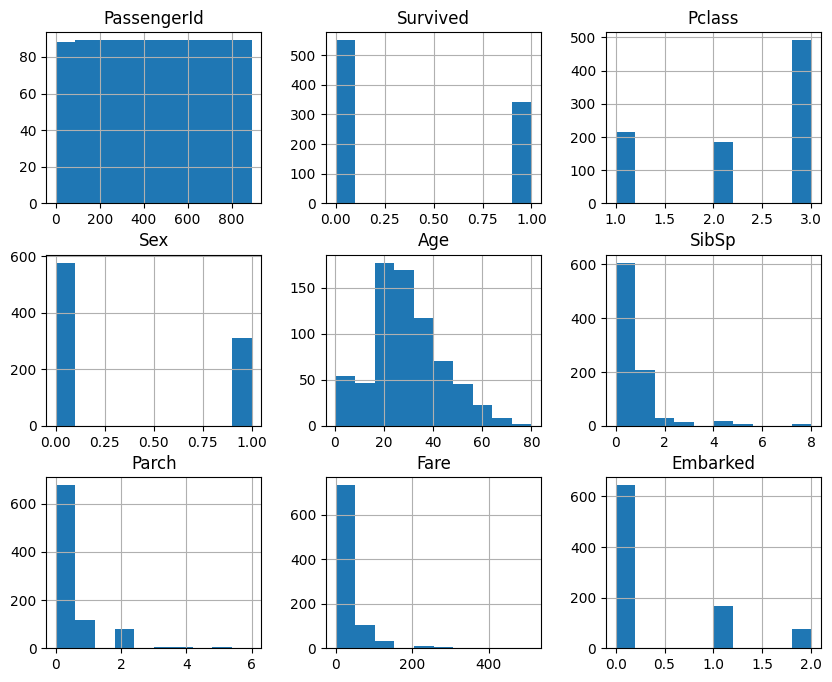

In [24]:
# histogram check
# (Frequency of determined data)
train_titanic_dropped.hist(figsize = (10, 8))
plt.show()
# Survival rate starts to show as expected(low)
# Classes seem ok, just 3 of them
# Age starts to look with high tendency towards young people

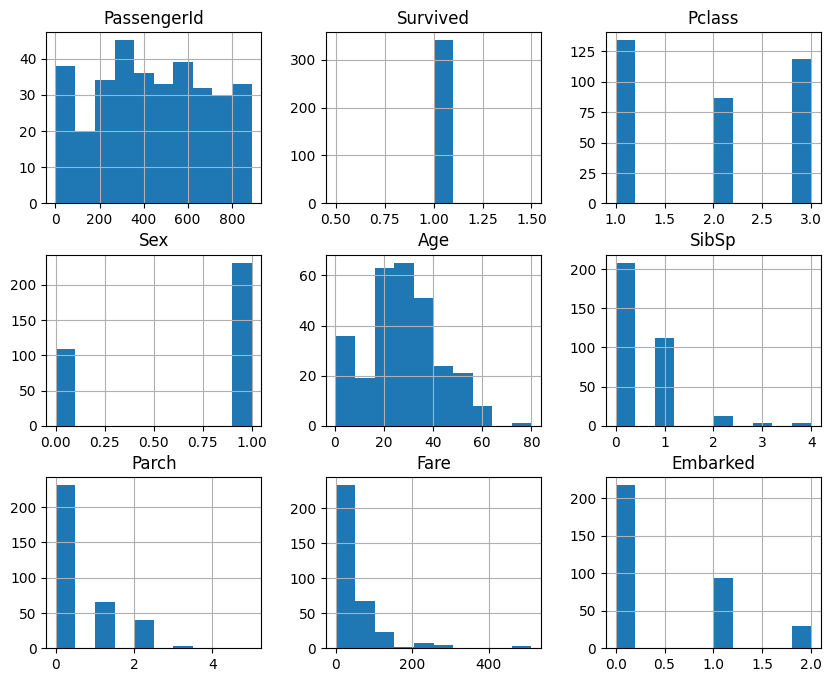

In [25]:
# Describe survived passengers
train_titanic_dropped[train_titanic_dropped['Survived'] == 1].hist(figsize = (10, 8))
plt.show()


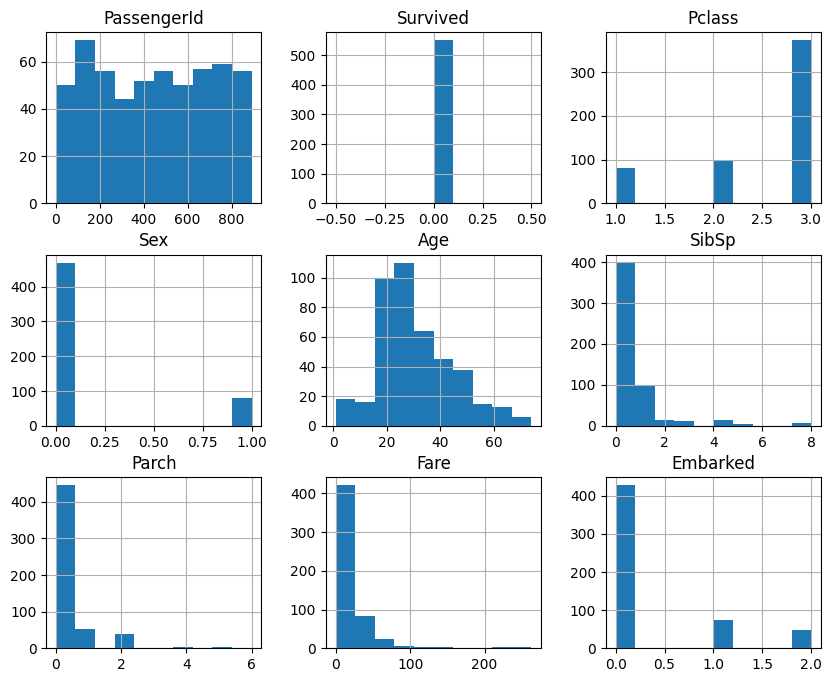

In [26]:
# Describe no survived passengers
train_titanic_dropped[train_titanic_dropped['Survived'] == 0].hist(figsize = (10, 8))
plt.show()


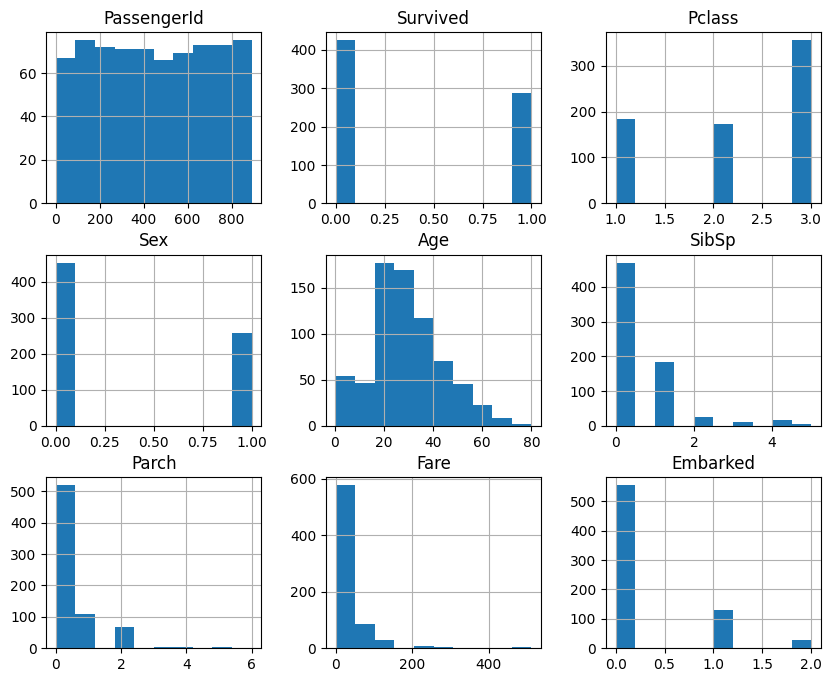

In [27]:
# histogram check
# (Frequency of determined data)
train_titanic_dropped_age_nan_rows.hist(figsize = (10, 8))
plt.show()
# Survival rate starts to show as expected(low)
# Classes seem ok, just 3 of them
# Age starts to look with high tendency towards young people

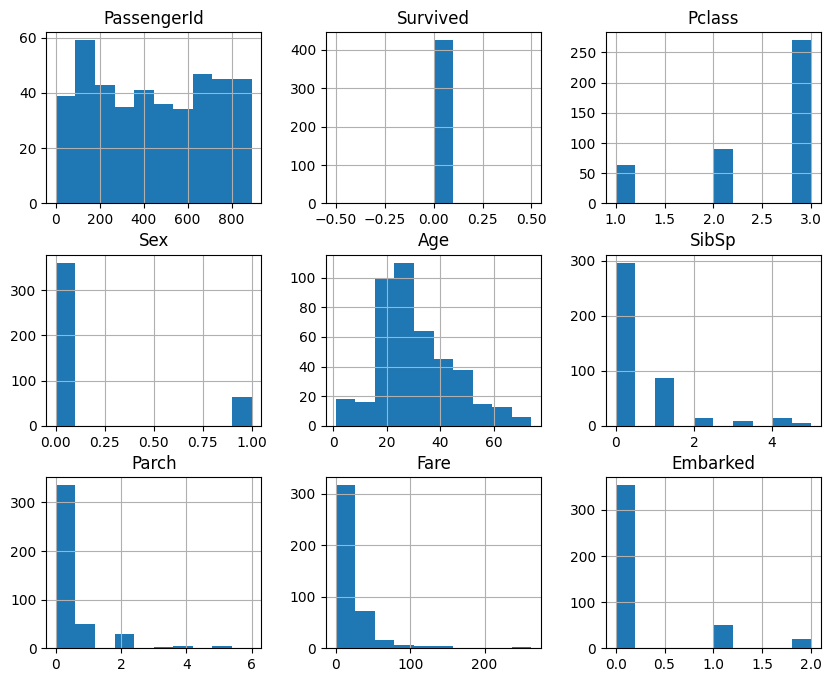

In [28]:
# Describe no survived passengers
train_titanic_dropped_age_nan_rows[train_titanic_dropped_age_nan_rows['Survived'] == 0].hist(figsize = (10, 8))
plt.show()

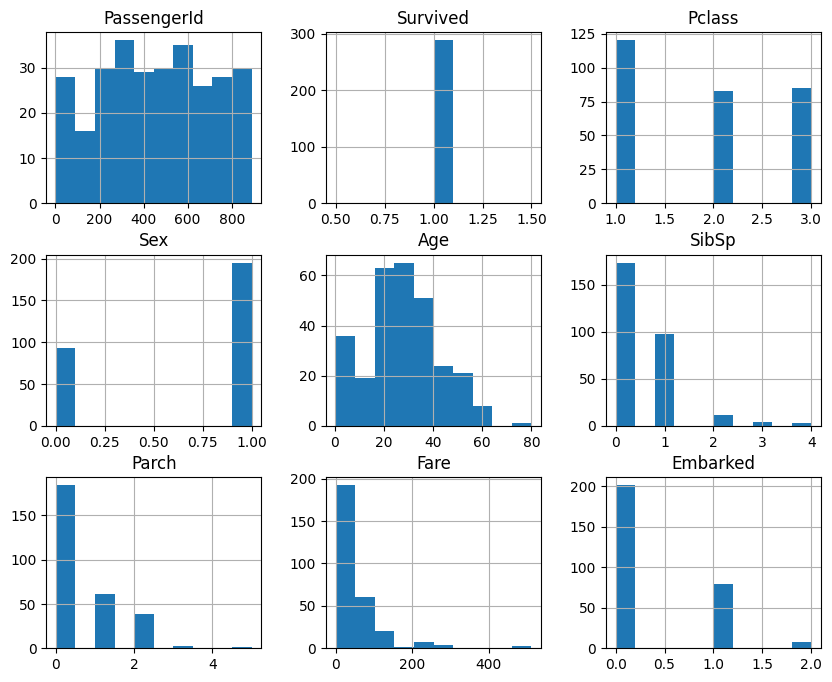

In [29]:
# Describe survived passengers
train_titanic_dropped_age_nan_rows[train_titanic_dropped_age_nan_rows['Survived'] == 1].hist(figsize = (10, 8))
plt.show()

PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Sex               Axes(0.125,0.381765;0.227941x0.226471)
Age            Axes(0.398529,0.381765;0.227941x0.226471)
SibSp          Axes(0.672059,0.381765;0.227941x0.226471)
Parch                 Axes(0.125,0.11;0.227941x0.226471)
Fare               Axes(0.398529,0.11;0.227941x0.226471)
Embarked           Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

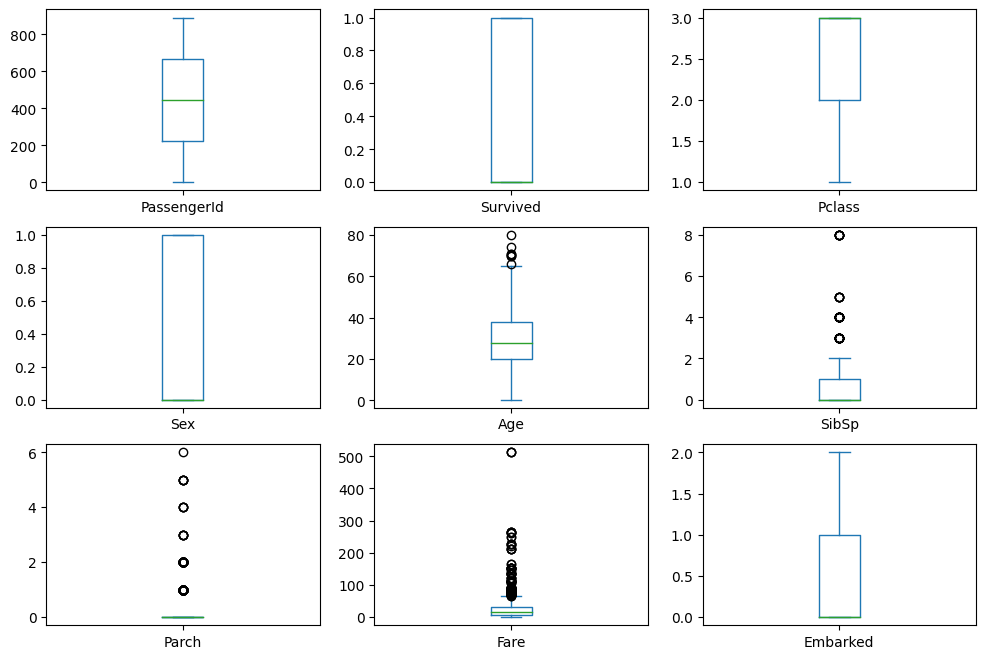

In [30]:
# boxplots
train_titanic.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (12, 8))
# Confirm that Older Ages were very few (outliers)
# Not a lot of siblings
# Not a lot of parents/children
# Very few paid a high fare

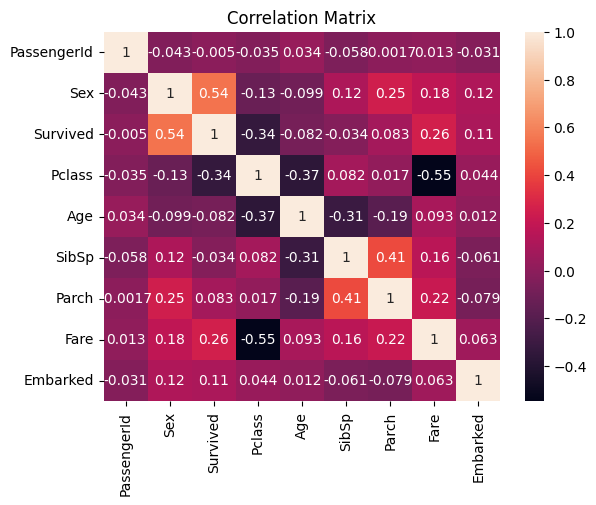

In [31]:
# heatmap
selected_columns = ['PassengerId', 'Sex',	'Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare', 'Embarked']
plt.title('Correlation Matrix')
column_x = train_titanic[selected_columns]
corr = column_x.corr()
sns.heatmap(corr, annot = True)
plt.show()

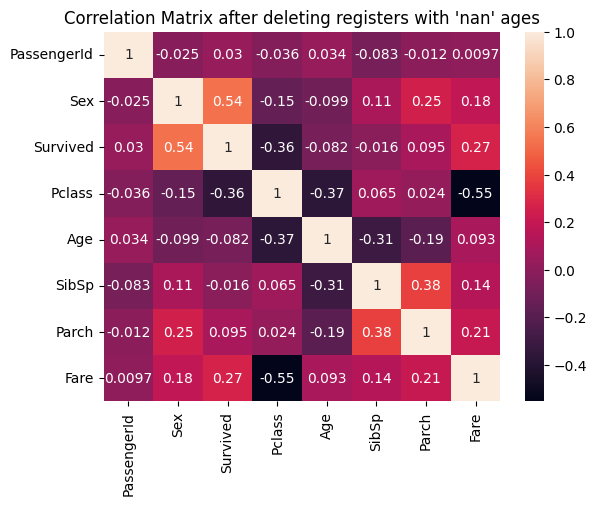

In [32]:
# heatmap
selected_columns = ['PassengerId', 'Sex',	'Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']
plt.title('Correlation Matrix after deleting registers with \'nan\' ages')
column_x = train_titanic_dropped_age_nan_rows[selected_columns]
corr = column_x.corr()
sns.heatmap(corr, annot=True)
plt.show()



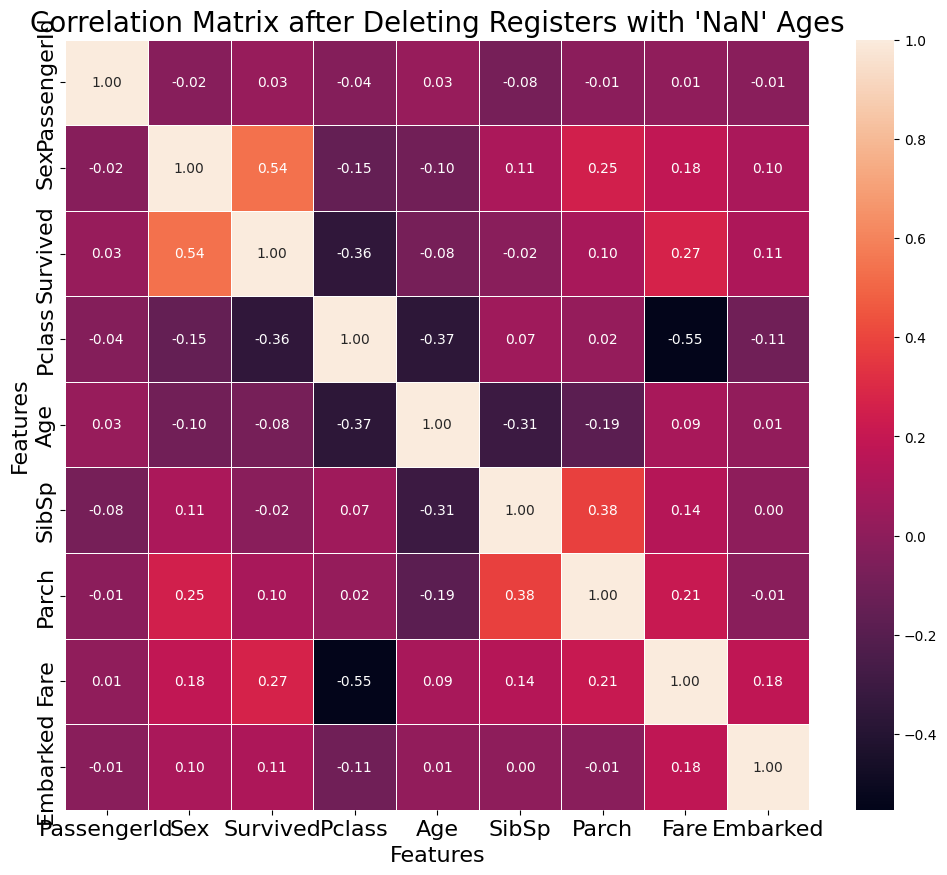

In [33]:

# Specify the columns for the correlation matrix
selected_columns = ['PassengerId', 'Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
column_x = train_titanic_dropped_age_nan_rows[selected_columns]

# Compute the correlation matrix
corr = column_x.corr()

# Create a larger figure for the heatmap
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)

# Set title and labels with increased font sizes
plt.title('Correlation Matrix after Deleting Registers with \'NaN\' Ages', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Increase font size of tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()


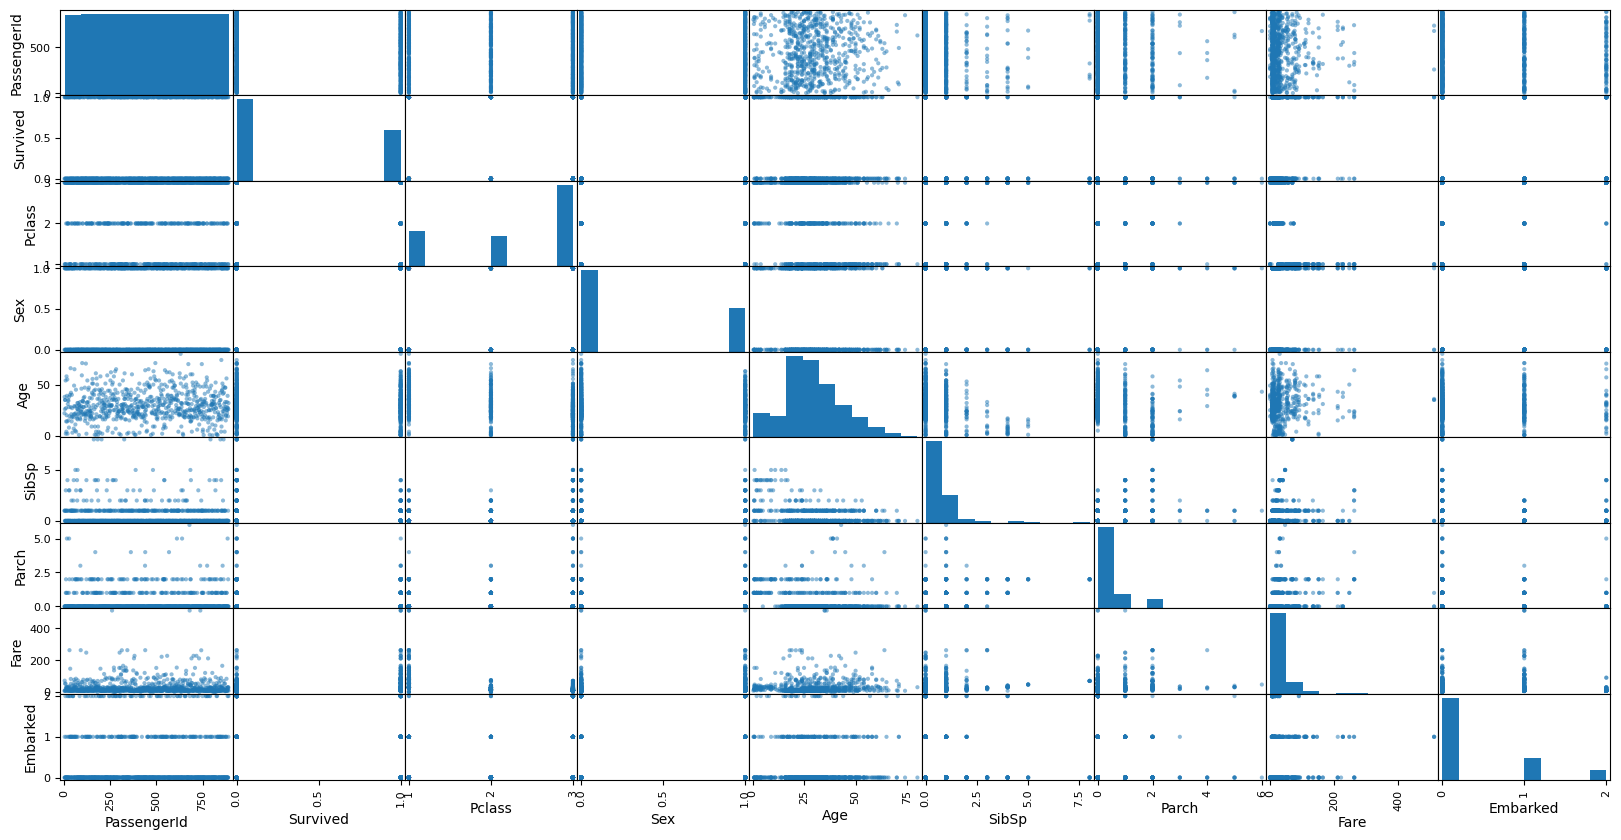

In [34]:
# Revisions de Scatter plot
pd.plotting.scatter_matrix(train_titanic, figsize = (20, 10))
plt.show()

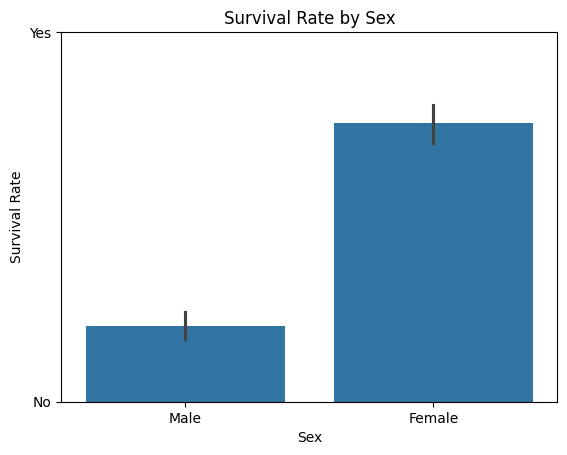

In [35]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_titanic_dropped_age_nan_rows)

# Customize the axis labels and title
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Customize tick labels for better readability
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])

# Display the plot
plt.show()


In [36]:
# Create a summary DataFrame
summary_df = train_titanic_dropped_age_nan_rows.groupby(['Sex', 'Survived']).size().unstack().fillna(0)
summary_df.columns = ['Not Survived', 'Survived']
summary_df = summary_df.reset_index()

# Plotting with Plotly
fig = px.bar(summary_df,
             x = 'Sex',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Sex',
             labels = {'value': 'Count', 'Sex': 'Gender'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    barmode = 'stack',
    xaxis_title = 'Gender',
    yaxis_title = 'Count',
    legend_title = 'Survival',
    legend = dict(x=0.8, y=0.9),
    xaxis = dict(
        title = 'Gender',  # X-axis title
        tickvals = [0, 1],  # Optional: Set specific tick values if needed
        ticktext = ['Male', 'Female'],  # Custom tick text
    ),
    yaxis = dict(
        title = 'Count',  # Y-axis title
        tickformat = ',',  # Format y-axis ticks with commas for thousands (if needed)
    )
)

# Show plot
fig.show()


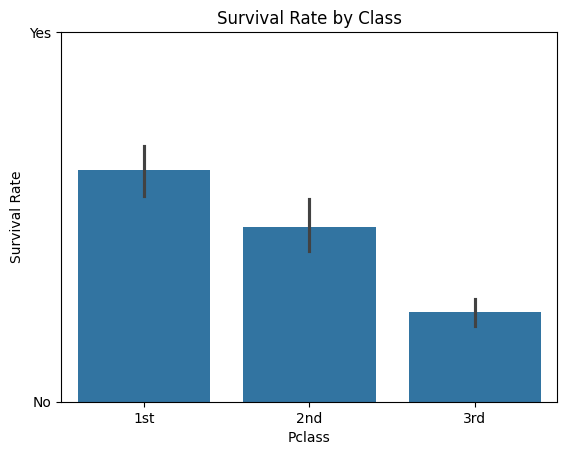

In [37]:
sns.barplot(x='Pclass', y='Survived', data = train_titanic_dropped)

# Customize the axis labels and title
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')

# Customize tick labels for better readability
plt.xticks(ticks = [0, 1, 2], labels = ['1st', '2nd', '3rd'])
plt.yticks(ticks = [0, 1], labels = ['No', 'Yes'])

# Display the plot
plt.show()

In [38]:
# Calculate the survival rate by class
class_survival_rates = train_titanic_dropped.groupby('Pclass')['Survived'].mean().reset_index()
class_survival_rates.columns = ['Pclass', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(class_survival_rates,
             x = 'Pclass',
             y = 'Survival Rate',
             title = 'Survival Rate by Class',
             labels = {'Pclass': 'Class', 'Survival Rate': 'Survival Rate'},
             color = 'Survival Rate',  # Optional: Color bars based on survival rate
             color_continuous_scale = 'Blues',  # Use a blue color scale for a nicer look
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    xaxis_title = 'Class',
    yaxis_title = 'Survival Rate',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for x-axis
    ),
    yaxis = dict(
        tickformat = '.0%',  # Format y-axis ticks as percentages
    ),
)

# Show plot
fig.show()


In [39]:
# Calculate the survival count by class
class_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival_counts.columns = ['Not Survived', 'Survived']
class_survival_counts = class_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(class_survival_counts,
             x = 'Pclass',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Class With NaN Age',
             labels = {'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             barmode = 'stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    xaxis_title = 'Class',
    yaxis_title = 'Count',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for x-axis
    ),
    yaxis = dict(
        title = 'Count',  # Y-axis title
    ),
    legend_title = 'Survival Status',
)

# Show plot
fig.show()


In [40]:
# Calculate the survival count by class
#WITH NAN AGE
class_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival_counts.columns = ['Not Survived', 'Survived']
class_survival_counts = class_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(class_survival_counts,
             x = 'Pclass',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Class WITH NaN Age',
             labels = {'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             barmode = 'stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title = {
        'text': 'Survival Counts by Class WITH NaN Age',
        'font': {'size': 24},  # Title font size
    },
    xaxis_title = {
        'text': 'Class',
        'font': {'size': 20},  # X-axis title font size
    },
    yaxis_title = {
        'text': 'Count',
        'font': {'size': 20},  # Y-axis title font size
    },
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for x-axis
        tickfont = {'size': 20}  # X-axis tick font size
    ),
    yaxis = dict(
        title = 'Count',  # Y-axis title
        tickfont = {'size': 20}  # Y-axis tick font size
    ),
    legend_title = {
        'text': 'Survival Status',
        'font': {'size': 20}  # Legend title font size
    },
    legend = dict(
        font = {'size': 20}  # Legend font size
    ),
    width = 800,  # Set the width of the plot
    height = 600  # Set the height of the plot
)

# Update text label font size
fig.update_traces(
    textfont = dict(size = 20)  # Font size for text labels inside bars
)

# Show plot
fig.show()


In [41]:
# Calculate the survival count by class
#NON NAN AGE
class_survival_counts = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival_counts.columns = ['Not Survived', 'Survived']
class_survival_counts = class_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(class_survival_counts,
             x = 'Pclass',
             y = ['Not Survived', 'Survived'],
             title = 'Survival Counts by Class NO NaN Age',
             labels = {'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map = {'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto = True,  # Add text labels on bars
             barmode = 'stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title = {
        'text': 'Survival Counts by Class NO NaN Age',
        'font': {'size': 24},  # Title font size
    },
    xaxis_title = {
        'text': 'Class',
        'font': {'size': 20},  # X-axis title font size
    },
    yaxis_title = {
        'text': 'Count',
        'font': {'size': 20},  # Y-axis title font size
    },
    xaxis = dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for x-axis
        tickfont={'size': 20}  # X-axis tick font size
    ),
    yaxis = dict(
        title='Count',  # Y-axis title
        tickfont={'size': 20}  # Y-axis tick font size
    ),
    legend_title = {
        'text': 'Survival Status',
        'font': {'size': 20}  # Legend title font size
    },
    legend = dict(
        font={'size': 20}  # Legend font size
    ),
    width = 800,  # Set the width of the plot
    height = 600  # Set the height of the plot
)

# Update text label font size
fig.update_traces(
    textfont = dict(size = 20)  # Font size for text labels inside bars
)

# Show plot
fig.show()


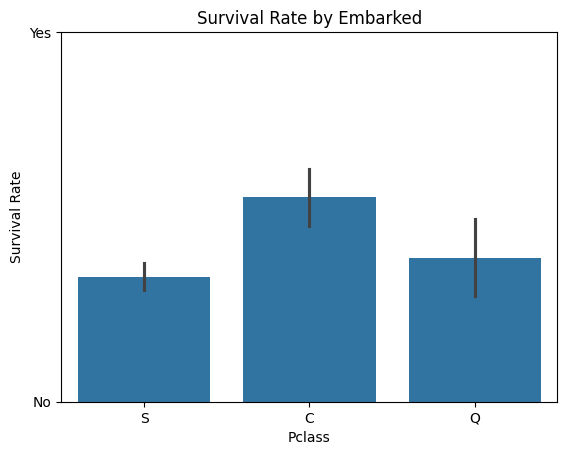

In [42]:
sns.barplot(x='Embarked', y='Survived', data = train_titanic_dropped)

# Customize the axis labels and title
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked')

# Customize tick labels for better readability
plt.xticks(ticks = [0, 1, 2], labels = ['S', 'C', 'Q'])
plt.yticks(ticks = [0, 1], labels = ['No', 'Yes'])

# Display the plot
plt.show()

In [43]:
# Calculate the survival rate by embarkation port
embarked_survival_rates = train_titanic_dropped.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_rates.columns = ['Embarked', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(embarked_survival_rates,
             x = 'Embarked',
             y = 'Survival Rate',
             title = 'Survival Rate by Embarked Port',
             labels = {'Embarked': 'Embarked Port', 'Survival Rate': 'Survival Rate'},
             color = 'Survival Rate',  # Optional: Color bars based on survival rate
             color_continuous_scale = 'Viridis',  # Use a color scale for a nicer look
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    xaxis_title = 'Embarked Port',
    yaxis_title = 'Survival Rate',
    xaxis = dict(
        tickvals = ['C', 'S', 'Q'],
        ticktext = ['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
    ),
    yaxis = dict(
        tickformat = '.0%',  # Format y-axis ticks as percentages
    ),
    width = 800,  # Set the width of the plot
    height = 600  # Set the height of the plot
)

# Show plot
fig.show()


In [44]:
# Calculate the survival rate by embarkation port
embarked_survival_rates = train_titanic_dropped.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_rates.columns = ['Embarked', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(embarked_survival_rates,
             x = 'Embarked',
             y = 'Survival Rate',
             title = 'Survival Rate by Embarked Port',
             labels = {'Embarked': '', 'Survival Rate': 'Survival Rate'},
             color = 'Survival Rate',  # Optional: Color bars based on survival rate

             #color_discrete_map={'0': '#FF9999', '1': '#66B3FF', '2': '#66B3FB'},  # Softer colors

             color_continuous_scale = 'Viridis',  # Use a color scale for a nicer look
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    title = {
        'text': 'Survival Rate by Embarked Port',
        'font': {'size': 24, 'family': 'Arial'},  # Title font size and family
        'x': 0.5  # Center title
    },

    yaxis_title = {
        'text': 'Survival Rate',
        'font': {'size': 18, 'family': 'Arial'},  # Y-axis title font size and family
    },
    xaxis = dict(
        tickvals = ['0', '1', '2'],
        ticktext = ['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
        tickfont = {'size': 20, 'family': 'Arial'},  # X-axis tick font size and family
    ),
    yaxis = dict(
        tickformat = '.0%',  # Format y-axis ticks as percentages
        tickfont = {'size': 20, 'family': 'Arial'},  # Y-axis tick font size and family
    ),
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins
    coloraxis_colorbar={
        'title': 'Survival Rate',  # Title for colorbar
        'tickvals': [0, 0.5, 1],  # Colorbar ticks
        'ticktext': ['Low', 'Medium', 'High'],  # Colorbar labels
        'title_font': {'size': 16, 'family': 'Arial'},  # Colorbar title font size and family
        'tickfont': {'size': 14, 'family': 'Arial'},  # Colorbar tick font size and family
    },
)

# Update text label font size
fig.update_traces(
    #textfont=dict(size=16, color='black'),  # Font size and color for text labels inside bars
 #   marker=dict(line=dict(color='black', width=1))  # Outline color and width for bars

# Update text label font size

    textfont=dict(size=20)  # Font size for text labels inside bars




)

# Show plot
fig.show()


In [45]:
# Calculate the survival count by embarkation port
embarked_survival_counts = train_titanic_dropped.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)
embarked_survival_counts.columns = ['Not Survived', 'Survived']
embarked_survival_counts = embarked_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(embarked_survival_counts,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             title='Survival Counts by Embarked Port',
             labels={'Embarked': 'Embarked Port', 'value': 'Count'},
             color_discrete_map={'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    xaxis_title='Embarked Port',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=['C', 'S', 'Q'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
    ),
    yaxis=dict(
        title='Count',  # Y-axis title
    ),
    legend_title='Survival Status',

    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)


fig.update_traces(

    textfont=dict(size=20)  # Font size for text labels inside bars




)

# Show plot
fig.show()


In [46]:

# Calculate the survival count by embarkation port
embarked_survival_counts = train_titanic_dropped.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)
embarked_survival_counts.columns = ['Not Survived', 'Survived']
embarked_survival_counts = embarked_survival_counts.reset_index()

# Plotting with Plotly
fig = px.bar(embarked_survival_counts,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             title='Survival Counts by Embarked Port',
             labels={'Embarked': '', 'value': 'Count'},
             color_discrete_map={'Not Survived': '#FF9999', 'Survived': '#66B3FF'},  # Softer colors
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Counts by Embarked Port',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': '',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Count',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat=',',  # Format y-axis ticks with commas
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Status',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20, color='black')  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [47]:
# Calculate the survival count by embarkation port, class, and survival status
grouped_counts = train_titanic.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(level=[2]).fillna(0)

# Calculate total counts for each combination of Embarked and Pclass
total_counts = grouped_counts.sum(axis=1)

# Calculate percentages
grouped_percentages = grouped_counts.div(total_counts, axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
grouped_percentages = grouped_percentages.reset_index()
grouped_percentages.columns = ['Embarked', 'Pclass', 'Not Survived', 'Survived']

# Plotting with Plotly
fig = px.bar(grouped_percentages,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             color='Pclass',
             title='Survival Percentages by Embarked Port and Class',
             labels={'Embarked': 'Embarked Port', 'value': 'Percentage'},
             color_discrete_map={1: '#66B3FF', 2: '#1f77b4', 3: '#a3a500'},  # Softer colors for different classes
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    height=600,  # Adjust height
    width=800,   # Adjust width
    xaxis_title='Embarked Port',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown']  # Custom labels for embarkation ports
    ),
    yaxis=dict(
        title='Percentage',  # Y-axis title
        tickformat='.1%'  # Format y-axis as percentages with one decimal place
    ),
    legend_title='Class'
)

# Show plot
fig.show()


In [48]:
# Calculate the survival count by embarkation port, class, and survival status
grouped_counts = train_titanic_dropped.groupby(['Embarked', 'Pclass', 'Survived']).size().unstack(level=[2]).fillna(0)

# Calculate total counts for each combination of Embarked and Pclass
total_counts = grouped_counts.sum(axis=1)

# Calculate percentages
grouped_percentages = grouped_counts.div(total_counts, axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
grouped_percentages = grouped_percentages.reset_index()
grouped_percentages.columns = ['Embarked', 'Pclass', 'Not Survived', 'Survived']

# Plotting with Plotly
fig = px.bar(grouped_percentages,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             color='Pclass',
             title='Survival Percentages by Embarked Port and Class',
             labels={'Embarked': '', 'value': 'Percentage'},
             color_discrete_map={1: '#66B3FF', 2: '#1f77b4', 3: '#a3a500'},  # Softer colors for different classes
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Percentages by Embarked Port and Class',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': '',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Percentage',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown'],  # Custom labels for embarkation ports
        tickfont={'size': 16, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.1%',  # Format y-axis as percentages with one decimal place
        tickfont={'size': 16, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Class',
        'font': {'size': 18, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 16, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=16)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [49]:
# Calculate the survival count by Embarked Port, Sex, and Survival Status
grouped_counts = train_titanic_dropped.groupby(['Embarked', 'Sex', 'Survived']).size().unstack(level=[2]).fillna(0)

# Calculate total counts for each combination of Embarked Port and Sex
total_counts = grouped_counts.sum(axis=1)

# Calculate percentages
grouped_percentages = grouped_counts.div(total_counts, axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
grouped_percentages = grouped_percentages.reset_index()
grouped_percentages.columns = ['Embarked', 'Sex', 'Not Survived', 'Survived']

# Plotting with Plotly
fig = px.bar(grouped_percentages,
             x='Embarked',
             y=['Not Survived', 'Survived'],
             color='Sex',
             title='Survival Percentages by Embarked Port and Sex',
             labels={'Embarked': 'Embarked Port', 'value': 'Percentage'},
             color_discrete_map={'female': '#FF9999', 'male': '#66B3FF'},  # Softer colors for gender
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for 'Not Survived' and 'Survived'
             )

# Customize layout
fig.update_layout(
    height=600,  # Adjust height for better visibility
    width=800,   # Adjust width for better visibility
    xaxis_title='Embarked Port',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=['0', '1', '2'],
        ticktext=['Cherbourg', 'Southampton', 'Queenstown']  # Custom labels for embarkation ports
    ),
    yaxis=dict(
        title='Percentage',  # Y-axis title
        tickformat='.1%'  # Format y-axis as percentages with one decimal place
    ),
    legend_title='Sex'
)
fig.update_traces(
    textfont=dict(size=16)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [50]:
# Calculate the survival rate by sex and class
survival_rates = train_titanic_dropped.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates.columns = ['Class', 'Sex', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(survival_rates,
             x = 'Class',
             y = 'Survival Rate',
             color = 'Sex',  # Color bars by sex
             barmode = 'group',  # Group bars by sex within each class
             title = 'Survival Rate by Class and Sex',
             labels = {'Class': 'Class', 'Survival Rate': 'Survival Rate'},
             color_discrete_map = {'male': '#4A90E2', 'female': '#FF69B4'},  # Custom colors
             text_auto = True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    height = 600,
    width = 600,
    xaxis_title = 'Class',
    yaxis_title = 'Survival Rate',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],  # Custom labels for classes
    ),
    yaxis=dict(
        tickformat='.0%',  # Format y-axis ticks as percentages
    ),
    legend_title='Sex'
)
fig.update_traces(
    textfont=dict(size=16)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [51]:
# Calculate the survival rate by sex and class
survival_rates = train_titanic_dropped.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates.columns = ['Class', 'Sex', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(survival_rates,
             x='Class',
             y='Survival Rate',
             color='Sex',  # Color bars by sex
             barmode='group',  # Group bars by sex within each class
             title='Survival Rate by Class and Sex',
             labels={'Class': 'Class', 'Survival Rate': 'Survival Rate'},
             color_discrete_map={'male': '#4A90E2', 'female': '#FF69B4'},  # Custom colors
             text_auto=True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rate by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for classes
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.0%',  # Format y-axis ticks as percentages
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=400,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [52]:
# Sample DataFrame creation (assuming you have your DataFrame as 'train_titanic_dropped')
# Uncomment and adjust the following line according to your actual DataFrame
# train_titanic_dropped = pd.read_csv('path_to_your_data.csv')

# Calculate the survival rate by sex and class
survival_rates = train_titanic_dropped.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_rates.columns = ['Class', 'Sex', 'Survival Rate']

# Plotting with Plotly
fig = px.bar(survival_rates,
             x='Class',
             y='Survival Rate',
             color='Sex',  # Color bars by sex
             barmode='group',  # Group bars by sex within each class
             title='Survival Rate by Class and Sex',
             labels={'Class': 'Class', 'Survival Rate': 'Survival Rate'},
             color_discrete_map={'male': '#ADD8E6', 'female': '#FFB6C1'},  # Light blue for male and pink for female
             text_auto=True,  # Add text labels on bars
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rate by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for classes
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.0%',  # Format y-axis ticks as percentages
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20)  # Increase font size for text labels inside bars
)

# Show plot
fig.show()


In [53]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts = class_sex_survival_counts.reset_index()
class_sex_survival_counts.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Counts by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map={
                 'Male_Not Survived': '#FF9999',
                 'Male_Survived': '#66B3FF',
                 'Female_Not Survived': '#FFCC99',
                 'Female_Survived': '#99CCFF'
             },  # Softer colors
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival counts
             )

# Customize layout
fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for x-axis
    ),
    yaxis=dict(
        title='Count',  # Y-axis title
    ),
    legend_title='Survival Status by Sex',
)

# Show plot
fig.show()


In [54]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts = class_sex_survival_counts.reset_index()
class_sex_survival_counts.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Counts by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map={
                 'Male_Not Survived': '#0133A0',  # Soft blue for not survived males
                 'Male_Survived': '#4B90E2',      # Darker blue for survived males
                 'Female_Not Survived': '#C71585', # Soft pink for not survived females
                 'Female_Survived': '#FF68B4'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival counts
             )

# Customize layout
fig.update_layout(
    height=600,  # Increase height
    width=600,   # Decrease width
    xaxis_title='Class',
    yaxis_title='Count',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd']  # Custom labels for x-axis
    ),
    yaxis=dict(
        title='Count'  # Y-axis title
    ),
    legend_title='Survival Status by Sex',
)

# Show plot
fig.show()


In [55]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts = class_sex_survival_counts.reset_index()
class_sex_survival_counts.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Counts by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Count'},
             color_discrete_map={
                 'Male_Not Survived': '#A3C4C9',  # Soft blue for not survived males
                 'Male_Survived': '#6C9ABF',      # Darker blue for survived males
                 'Female_Not Survived': '#F4A6A1', # Soft pink for not survived females
                 'Female_Survived': '#F87C7C'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival counts
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Counts by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Count',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for classes
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Status by Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=700,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20, color='black')  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [56]:
# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Calculate percentages
class_sex_survival_counts_percentage = class_sex_survival_counts.div(class_sex_survival_counts.sum(axis=1), axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts_percentage = class_sex_survival_counts_percentage.reset_index()
class_sex_survival_counts_percentage.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts_percentage,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Percentages by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Percentage'},
             color_discrete_map={
                 'Male_Not Survived': '#A3C4C9',  # Soft blue for not survived males
                 'Male_Survived': '#6C9ABF',      # Darker blue for survived males
                 'Female_Not Survived': '#F4A6A1', # Soft pink for not survived females
                 'Female_Survived': '#F87C7C'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival percentages
             )

# Customize layout
fig.update_layout(
    height=600,  # Increase height
    width=600,   # Decrease width
    xaxis_title='Class',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd']  # Custom labels for x-axis
    ),
    yaxis=dict(
        title='Percentage',  # Y-axis title
        tickformat='.0%'  # Format y-axis as percentages
    ),
    legend_title='Survival Status by Sex',
)

# Show plot
fig.show()


In [57]:

# Calculate the survival count by class, sex, and survival status
class_sex_survival_counts = train_titanic_dropped.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Calculate percentages
class_sex_survival_counts_percentage = class_sex_survival_counts.div(class_sex_survival_counts.sum(axis=1), axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_sex_survival_counts_percentage = class_sex_survival_counts_percentage.reset_index()
class_sex_survival_counts_percentage.columns = ['Pclass', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Plotting with Plotly
fig = px.bar(class_sex_survival_counts_percentage,
             x='Pclass',
             y=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
             title='Survival Percentages by Class and Sex',
             labels={'Pclass': 'Class', 'value': 'Percentage'},
             color_discrete_map={
                 'Male_Not Survived': '#A3C4C9',  # Soft blue for not survived males
                 'Male_Survived': '#6C9ABF',      # Darker blue for survived males
                 'Female_Not Survived': '#F4A6A1', # Soft pink for not survived females
                 'Female_Survived': '#F87C7C'     # Darker pink for survived females
             },
             text_auto=True,  # Add text labels on bars
             barmode='stack'  # Stack bars for survival percentages
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Percentages by Class and Sex',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Class',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Percentage',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],  # Custom labels for x-axis
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        title='Percentage',
        tickformat='.0%',  # Format y-axis as percentages
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Status by Sex',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    height=600,  # Adjust height
    width=800,   # Adjust width
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20, color='black')  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [58]:
import pandas as pd
import plotly.express as px

# Example DataFrame creation
# Replace this with your actual DataFrame if needed
parch_survival_rates = train_titanic_dropped_age_nan_rows.groupby('Parch')['Survived'].mean().reset_index()
parch_survival_rates.rename(columns={'Survived': 'Survival Rate'}, inplace=True)

# Convert survival rates to percentages and round to two decimal places
parch_survival_rates['Survival Rate'] = (parch_survival_rates['Survival Rate'] * 100).round(2)

# Plotting with Plotly
fig = px.bar(parch_survival_rates,
             x='Parch',
             y='Survival Rate',
             title='Survival Rates by Number of Parents/Children Aboard',
             labels={'Parch': 'Number of Parents/Children Aboard', 'Survival Rate': 'Survival Rate (%)'},
             text='Survival Rate',  # Add text labels on bars
             color='Survival Rate',  # Color bars by survival rate
             color_continuous_scale='Greens',  # Use a continuous color scale
             height=400,  # Adjust height
             width=800   # Adjust width
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rates by Number of Parents/Children Aboard',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Number of Parents/Children Aboard',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate (%)',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.2f%',  # Format y-axis as percentages with two decimal places
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Rate',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars and format as percentages
fig.update_traces(
    texttemplate='%{text:.0f}%',  # Format text labels to percentages with two decimal places
    textfont=dict(size=20)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [59]:

# Calculate survival rates by SibSp
sibsp_survival_rates = train_titanic_dropped_age_nan_rows.groupby('SibSp')['Survived'].mean().reset_index()

# Convert survival rates to percentages and round to two decimal places
sibsp_survival_rates['Survival Rate (%)'] = (sibsp_survival_rates['Survived'] * 100).round(2)

# Plotting with Plotly
fig = px.bar(sibsp_survival_rates,
             x='SibSp',
             y='Survival Rate (%)',
             title='Survival Rates by Number of Siblings/Spouses Aboard',
             labels={'SibSp': 'Number of Siblings/Spouses Aboard', 'Survival Rate (%)': 'Survival Rate (%)'},
             text='Survival Rate (%)',  # Add text labels on bars
             color='Survival Rate (%)',  # Color bars by survival rate
             color_continuous_scale='Purples',  # Use a continuous color scale
             height=400,  # Adjust height
             width=800   # Adjust width
             )

# Customize layout
fig.update_layout(
    title={
        'text': 'Survival Rates by Number of Siblings/Spouses Aboard',
        'font': {'size': 28, 'family': 'Arial'},  # Increase title font size
        'x': 0.5  # Center title
    },
    xaxis_title={
        'text': 'Number of Siblings/Spouses Aboard',
        'font': {'size': 22, 'family': 'Arial'},  # Increase X-axis title font size
    },
    yaxis_title={
        'text': 'Survival Rate (%)',
        'font': {'size': 22, 'family': 'Arial'},  # Increase Y-axis title font size
    },
    xaxis=dict(
        tickfont={'size': 20, 'family': 'Arial'}  # Increase X-axis tick font size
    ),
    yaxis=dict(
        tickformat='.2f%',  # Format y-axis as percentages with two decimal places
        tickfont={'size': 20, 'family': 'Arial'}  # Increase Y-axis tick font size
    ),
    legend_title={
        'text': 'Survival Rate',
        'font': {'size': 20, 'family': 'Arial'}  # Increase legend title font size
    },
    legend=dict(
        font={'size': 20, 'family': 'Arial'}  # Increase legend font size
    ),
    margin=dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update text label font size inside bars and format as percentages
fig.update_traces(
    texttemplate='%{text:.0f}%',  # Format text labels to percentages with two decimal places
    textfont=dict(size=20)  # Increase font size and color for text labels inside bars
)

# Show plot
fig.show()


In [60]:
# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins
train_titanic_dropped['AgeGroup'] = pd.cut(train_titanic_dropped['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival count by class, age group, and survival status
class_age_survival_counts = train_titanic_dropped.groupby(['Pclass', 'AgeGroup', 'Survived']).size().unstack(level=[1, 2]).fillna(0)

# Calculate percentages
class_age_survival_counts_percentage = class_age_survival_counts.div(class_age_survival_counts.sum(axis=1), axis=0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_age_survival_counts_percentage = class_age_survival_counts_percentage.reset_index()
class_age_survival_counts_percentage.columns = ['Pclass', '0-12_Not Survived', '0-12_Survived', '13-18_Not Survived', '13-18_Survived',
                                               '19-30_Not Survived', '19-30_Survived', '31-50_Not Survived', '31-50_Survived', '51+_Not Survived', '51+_Survived']

# Plotting with Plotly
fig = px.bar(class_age_survival_counts_percentage,
             x='Pclass',
             y=['0-12_Not Survived', '0-12_Survived', '13-18_Not Survived', '13-18_Survived',
                '19-30_Not Survived', '19-30_Survived', '31-50_Not Survived', '31-50_Survived',
                '51+_Not Survived', '51+_Survived'],
             title='Survival Percentages by Class and Age Group',
             labels={'Pclass': 'Class', 'value': 'Percentage'},
             color_discrete_map={
                 '0-12_Not Survived': '#A3C4C9',
                 '0-12_Survived': '#6C9ABF',
                 '13-18_Not Survived': '#F4A6A1',
                 '13-18_Survived': '#F87C7C',
                 '19-30_Not Survived': '#B5B7FF',
                 '19-30_Survived': '#8A8CFF',
                 '31-50_Not Survived': '#FFB5B5',
                 '31-50_Survived': '#FF8A8A',
                 '51+_Not Survived': '#C4E1F5',
                 '51+_Survived': '#9AC0E1'
             },
             text_auto=True,
             barmode='stack'
             )

# Customize layout
fig.update_layout(
    height=600,
    width=600,
    xaxis_title='Class',
    yaxis_title='Percentage',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd']
    ),
    yaxis=dict(
        title='Percentage',
        tickformat='.0%'
    ),
    legend_title='Survival Status by Age Group',
)

# Show plot
fig.show()


In [61]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival count by class, age group, sex, and survival status
class_age_sex_survival_counts = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'AgeGroup', 'Sex', 'Survived']).size().unstack(level=[2, 3]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_age_sex_survival_counts = class_age_sex_survival_counts.reset_index()
class_age_sex_survival_counts.columns = ['Pclass', 'AgeGroup', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Melt the DataFrame to long format for easier plotting
class_age_sex_survival_counts_long = class_age_sex_survival_counts.melt(
    id_vars=['Pclass', 'AgeGroup'],
    value_vars=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
    var_name='Sex_Survived',
    value_name='Count'
)

# Extract Sex and Survival Status from the column names
class_age_sex_survival_counts_long[['Sex', 'Survived']] = class_age_sex_survival_counts_long['Sex_Survived'].str.split('_', expand=True)
class_age_sex_survival_counts_long = class_age_sex_survival_counts_long.drop(columns='Sex_Survived')

# Define colors
colors = {
    'Male_Survived': '#4A90E2',    # Light blue for survived males
    'Male_Not Survived': '#0033A0', # Dark blue for not survived males
    'Female_Survived': '#FF69B4',  # Light pink for survived females
    'Female_Not Survived': '#C71585'  # Dark pink for not survived females
}

# Create subplots
age_groups = class_age_sex_survival_counts_long['AgeGroup'].unique()
n_age_groups = len(age_groups)

fig = make_subplots(
    rows = 1,
    cols = n_age_groups,
    subplot_titles = [f'Age Group: {age_group}' for age_group in age_groups],
    shared_yaxes = True
)

# Add bar plots for each age group
for i, age_group in enumerate(age_groups):
    age_data = class_age_sex_survival_counts_long[class_age_sex_survival_counts_long['AgeGroup'] == age_group]
    for (sex, survived), group_data in age_data.groupby(['Sex', 'Survived']):
        label = f'{sex} {survived}'
        color = colors[f'{sex}_{survived}']
        fig.add_trace(
            go.Bar(
                x = group_data['Pclass'],
                y = group_data['Count'],
                name = label,
                marker_color = color,
                legendgroup = label,
                offsetgroup = 0,
                width = 0.4
            ),
            row = 1,
            col = i + 1
        )

# Update layout
fig.update_layout(
    height = 600,
    width = 1200,
    title_text = 'Survival Counts by Class, Age Group, and Sex',
    barmode = 'stack',
    xaxis_title = 'Class',
    yaxis_title = 'Count',
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd']
    ),
    legend_title = 'Sex and Survival Status',

)

fig.update_xaxes(title_text = "Class")
fig.update_yaxes(title_text = "Count")

# Show plot
fig.show()


In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create age bins
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival count by class, age group, sex, and survival status
class_age_sex_survival_counts = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'AgeGroup', 'Sex', 'Survived']).size().unstack(level=[2, 3]).fillna(0)

# Reset index to convert multi-index DataFrame to regular DataFrame
class_age_sex_survival_counts = class_age_sex_survival_counts.reset_index()
class_age_sex_survival_counts.columns = ['Pclass', 'AgeGroup', 'Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived']

# Melt the DataFrame to long format for easier plotting
class_age_sex_survival_counts_long = class_age_sex_survival_counts.melt(
    id_vars=['Pclass', 'AgeGroup'],
    value_vars=['Male_Not Survived', 'Male_Survived', 'Female_Not Survived', 'Female_Survived'],
    var_name='Sex_Survived',
    value_name='Count'
)

# Extract Sex and Survival Status from the column names
class_age_sex_survival_counts_long[['Sex', 'Survived']] = class_age_sex_survival_counts_long['Sex_Survived'].str.split('_', expand=True)
class_age_sex_survival_counts_long = class_age_sex_survival_counts_long.drop(columns='Sex_Survived')

# Define colors
colors = {
    'Male_Survived': '#4A90E2',    # Light blue for survived males
    'Male_Not Survived': '#0033A0', # Dark blue for not survived males
    'Female_Survived': '#FF69B4',  # Light pink for survived females
    'Female_Not Survived': '#C71585'  # Dark pink for not survived females
}

# Create subplots
age_groups = class_age_sex_survival_counts_long['AgeGroup'].unique()
n_age_groups = len(age_groups)

fig = make_subplots(
    rows=1,
    cols=n_age_groups,
    subplot_titles=[f'Age Group: {age_group}' for age_group in age_groups],
    shared_yaxes=True
)

# Add bar plots for each age group
for i, age_group in enumerate(age_groups):
    age_data = class_age_sex_survival_counts_long[class_age_sex_survival_counts_long['AgeGroup'] == age_group]
    for (sex, survived), group_data in age_data.groupby(['Sex', 'Survived']):
        label = f'{sex} {survived}'
        color = colors[f'{sex}_{survived}']
        fig.add_trace(
            go.Bar(
                x=group_data['Pclass'],
                y=group_data['Count'],
                name=label,
                marker_color=color,
                legendgroup=label,
                offsetgroup=0,
                width=0.4
            ),
            row=1,
            col=i + 1
        )

# Update layout
fig.update_layout(
    height = 600,
    width = 1200,
    title_text = 'Survival Counts by Class, Age Group, and Sex',
    title_font = dict(size = 28),  # Increase main title font size
    barmode = 'stack',
    xaxis_title = dict(
        text = 'Class',
        font = dict(size = 22)  # Increase X-axis title font size
    ),
    yaxis_title = dict(
        text = 'Count',
        font = dict(size = 22)  # Increase Y-axis title font size
    ),
    xaxis = dict(
        tickvals = [1, 2, 3],
        ticktext = ['1st', '2nd', '3rd'],
        tickfont = dict(size = 16)  # Increase X-axis tick font size
    ),
    yaxis = dict(
        title = 'Count',
        tickfont = dict(size = 16),  # Increase Y-axis tick font size
        tickformat = ','
    ),
    legend_title = dict(
        text = 'Sex and Survival Status',
        font = dict(size = 18)  # Increase legend title font size
    ),
    legend = dict(
        font = dict(size = 16)  # Increase legend item font size
    ),
    margin = dict(l=60, r=60, t=80, b=60)  # Adjust margins to accommodate larger text
)

# Update x-axes for each subplot to ensure consistent tick labels
for i in range(1, n_age_groups + 1):
    fig.update_xaxes(
        tickvals=[1, 2, 3],
        ticktext=['1st', '2nd', '3rd'],
        row=1,
        col=i,
        title_text="Class",
        title_font=dict(size=18),  # Increase X-axis title font size
        tickfont=dict(size=20)  # Increase X-axis tick font size
    )

# Update y-axes for each subplot to ensure consistent title and tick labels
for i in range(1, n_age_groups + 1):
    fig.update_yaxes(
        title_text="Count",
        title_font=dict(size=22),  # Increase Y-axis title font size
        tickfont=dict(size=20),  # Increase Y-axis tick font size
        row=1,
        col=i
    )

# Update text label font size inside bars
fig.update_traces(
    textfont=dict(size=20)  # Increase font size for text labels inside bars
)

# Show plot
fig.show()


In [63]:
import pandas as pd

# Assuming `train_titanic_dropped_age_nan_rows` is your DataFrame
# Create age bins and labels
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins

# Assign age groups
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Total count of males and females by class that survivev
total_by_class_and_sex = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')
total_by_class_and_sex.columns = ['Class', 'Sex', 'Survived','Count']
total_by_class_and_sex['Sex'] = total_by_class_and_sex['Sex'].replace({'male': 'Male', 'female': 'Female'})
total_by_class_and_sex['Class'] = total_by_class_and_sex['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("Total count of males and females by class (not survived = 0):")
print(total_by_class_and_sex.to_string(index=False))

# Total count of males and females by age group, class and survival
total_by_age_group_and_sex = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup', 'Sex', 'Pclass','Survived']).size().reset_index(name='Count')
total_by_age_group_and_sex.columns = ['Age Group', 'Sex','Pclass', 'Survived', 'Count']
total_by_age_group_and_sex['Sex'] = total_by_age_group_and_sex['Sex'].replace({'male': 'Male', 'female': 'Female'})

print("\nTotal count of males and females by age group and class:")
print(total_by_age_group_and_sex.to_string(index=False))

# Total counts by class
total_by_class = train_titanic_dropped_age_nan_rows.groupby(['Pclass']).size().reset_index(name='Total Count')
total_by_class.columns = ['Class', 'Total Count']
total_by_class['Class'] = total_by_class['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("\nTotal count by class:")
print(total_by_class.to_string(index=False))

# Total counts by age group
total_by_age_group = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup']).size().reset_index(name='Total Count')
total_by_age_group.columns = ['Age Group', 'Total Count']

print("\nTotal count by age group:")
print(total_by_age_group.to_string(index=False))


Total count of males and females by class (not survived = 0):
Class  Sex  Survived  Count
  1st    0         0     61
  1st    0         1     40
  1st    1         0      3
  1st    1         1     80
  2nd    0         0     84
  2nd    0         1     15
  2nd    1         0      6
  2nd    1         1     68
  3rd    0         0    215
  3rd    0         1     38
  3rd    1         0     55
  3rd    1         1     47

Total count of males and females by age group and class:
Age Group  Sex  Pclass  Survived  Count
     0-12    0       1         0      0
     0-12    0       1         1      3
     0-12    0       2         0      0
     0-12    0       2         1      9
     0-12    0       3         0     16
     0-12    0       3         1      8
     0-12    1       1         0      1
     0-12    1       1         1      0
     0-12    1       2         0      0
     0-12    1       2         1      8
     0-12    1       3         0     12
     0-12    1       3         1    

In [64]:
# Assuming `train_titanic_dropped_age_nan_rows` is your DataFrame
# Create age bins and labels
bins = [0, 12, 18, 30, 50, 80]  # Define age bins
labels = ['0-12', '13-18', '19-30', '31-50', '51+']  # Labels for bins

# Assign age groups
train_titanic_dropped_age_nan_rows['AgeGroup'] = pd.cut(train_titanic_dropped_age_nan_rows['Age'], bins=bins, labels=labels, right=False)

# Total count of males and females by class
total_by_class_and_sex = train_titanic_dropped_age_nan_rows.groupby(['Pclass', 'Sex']).size().reset_index(name='Count')
total_by_class_and_sex.columns = ['Class', 'Sex', 'Count']
total_by_class_and_sex['Sex'] = total_by_class_and_sex['Sex'].map({'male': 'Male', 'female': 'Female'})
total_by_class_and_sex['Class'] = total_by_class_and_sex['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("Total count of males and females by class:")
print(total_by_class_and_sex.to_string(index=False))

# Total count of males and females by age group
total_by_age_group_and_sex = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup', 'Sex']).size().reset_index(name='Count')
total_by_age_group_and_sex.columns = ['Age Group', 'Sex', 'Count']
total_by_age_group_and_sex['Sex'] = total_by_age_group_and_sex['Sex'].map({'0': 'Male', '1': 'Female'})

print("\nTotal count of males and females by age group:")
print(total_by_age_group_and_sex.to_string(index=False))

# Total counts by class
total_by_class = train_titanic_dropped_age_nan_rows.groupby(['Pclass']).size().reset_index(name='Total Count')
total_by_class.columns = ['Class', 'Total Count']
total_by_class['Class'] = total_by_class['Class'].map({1: '1st', 2: '2nd', 3: '3rd'})

print("\nTotal count by class:")
print(total_by_class.to_string(index=False))

# Total counts by age group
total_by_age_group = train_titanic_dropped_age_nan_rows.groupby(['AgeGroup']).size().reset_index(name='Total Count')
total_by_age_group.columns = ['Age Group', 'Total Count']

print("\nTotal count by age group:")
print(total_by_age_group.to_string(index=False))


Total count of males and females by class:
Class Sex  Count
  1st NaN    101
  1st NaN     83
  2nd NaN     99
  2nd NaN     74
  3rd NaN    253
  3rd NaN    102

Total count of males and females by age group:
Age Group Sex  Count
     0-12 NaN     36
     0-12 NaN     32
    13-18 NaN     22
    13-18 NaN     23
    19-30 NaN    179
    19-30 NaN     92
    31-50 NaN    164
    31-50 NaN     91
      51+ NaN     51
      51+ NaN     21

Total count by class:
Class  Total Count
  1st          184
  2nd          173
  3rd          355

Total count by age group:
Age Group  Total Count
     0-12           68
    13-18           45
    19-30          271
    31-50          255
      51+           72


### Step 4: Feature Engineering

For the dataset with Age with NaN rows:

In [65]:
train_titanic_dropped_age_nan_rows.head(50)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
0             1         0       3    0  22.0      1      0    7.2500   
1             2         1       1    1  38.0      1      0   71.2833   
2             3         1       3    1  26.0      0      0    7.9250   
3             4         1       1    1  35.0      1      0   53.1000   
4             5         0       3    0  35.0      0      0    8.0500   
6             7         0       1    0  54.0      0      0   51.8625   
7             8         0       3    0   2.0      3      1   21.0750   
8             9         1       3    1  27.0      0      2   11.1333   
9            10         1       2    1  14.0      1      0   30.0708   
10           11         1       3    1   4.0      1      1   16.7000   
11           12         1       1    1  58.0      0      0   26.5500   
12           13         0       3    0  20.0      0      0    8.0500   
13           14         0       3    0  39.0      1      5   31.2750   
14           15         0       3    1  14.0      0      0    7.8542   
15           16         1       2    1  55.0      0      0   16.0000   
16           17         0       3    0   2.0      4      1   29.1250   
18           19         0       3    1  31.0      1      0   18.0000   
20           21         0       2    0  35.0      0      0   26.0000   
21           22         1       2    0  34.0      0      0   13.0000   
22           23         1       3    1  15.0      0      0    8.0292   
23           24         1       1    0  28.0      0      0   35.5000   
24           25         0       3    1   8.0      3      1   21.0750   
25           26         1       3    1  38.0      1      5   31.3875   
27           28         0       1    0  19.0      3      2  263.0000   
30           31         0       1    0  40.0      0      0   27.7208   
33           34         0       2    0  66.0      0      0   10.5000   
34           35         0       1    0  28.0      1      0   82.1708   
35           36         0       1    0  42.0      1      0   52.0000   
37           38         0       3    0  21.0      0      0    8.0500   
38           39         0       3    1  18.0      2      0   18.0000   
39           40         1       3    1  14.0      1      0   11.2417   
40           41         0       3    1  40.0      1      0    9.4750   
41           42         0       2    1  27.0      1      0   21.0000   
43           44         1       2    1   3.0      1      2   41.5792   
44           45         1       3    1  19.0      0      0    7.8792   
49           50         0       3    1  18.0      1      0   17.8000   
50           51         0       3    0   7.0      4      1   39.6875   
51           52         0       3    0  21.0      0      0    7.8000   
52           53         1       1    1  49.0      1      0   76.7292   
53           54         1       2    1  29.0      1      0   26.0000   
54           55         0       1    0  65.0      0      1   61.9792   
56           57         1       2    1  21.0      0      0   10.5000   
57           58         0       3    0  28.5      0      0    7.2292   
58           59         1       2    1   5.0      1      2   27.7500   
59           60         0       3    0  11.0      5      2   46.9000   
60           61         0       3    0  22.0      0      0    7.2292   
62           63         0       1    0  45.0      1      0   83.4750   
63           64         0       3    0   4.0      3      2   27.9000   
66           67         1       2    1  29.0      0      0   10.5000   
67           68         0       3    0  19.0      0      0    8.1583   

    Embarked AgeGroup  
0          0    19-30  
1          1    31-50  
2          0    19-30  
3          0    31-50  
4          0    31-50  
6          0      51+  
7          0     0-12  
8          0    19-30  
9          1    13-18  
10         0     0-12  
11         0      51+  
12         0    19-30  
13         0    31-

In [66]:
# Define the mapping from age group strings to integers
age_group_mapping = {
    '0-12': 0,
    '13-18': 1,
    '19-30': 2,
    '31-50': 3,
    '51+': 4
}

# Apply the mapping to the 'AgeGroup' column
train_titanic_dropped_age_nan_rows['AgeGroup'] = train_titanic_dropped_age_nan_rows['AgeGroup'].map(age_group_mapping)

# Verify the DataFrame
print("DataFrame after Mapping:")
print(train_titanic_dropped_age_nan_rows)

# Optional: Further factorize if needed
# Factorize will convert the values to unique integers if required, though they are already integers
train_titanic_dropped_age_nan_rows['AgeGroup'], unique = pd.factorize(train_titanic_dropped_age_nan_rows['AgeGroup'])

# Verify the DataFrame after optional factorization
print("\nDataFrame after Optional Factorization:")
print(train_titanic_dropped_age_nan_rows)

DataFrame after Mapping:
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.0      1      0   7.2500   
1              2         1       1    1  38.0      1      0  71.2833   
2              3         1       3    1  26.0      0      0   7.9250   
3              4         1       1    1  35.0      1      0  53.1000   
4              5         0       3    0  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
885          886         0       3    1  39.0      0      5  29.1250   
886          887         0       2    0  27.0      0      0  13.0000   
887          888         1       1    1  19.0      0      0  30.0000   
889          890         1       1    0  26.0      0      0  30.0000   
890          891         0       3    0  32.0      0      0   7.7500   

     Embarked AgeGroup  
0           0        2  
1           1        3  
2           0        2  
3         

In [67]:
train_titanic_dropped_age_nan_rows

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.0      1      0   7.2500   
1              2         1       1    1  38.0      1      0  71.2833   
2              3         1       3    1  26.0      0      0   7.9250   
3              4         1       1    1  35.0      1      0  53.1000   
4              5         0       3    0  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
885          886         0       3    1  39.0      0      5  29.1250   
886          887         0       2    0  27.0      0      0  13.0000   
887          888         1       1    1  19.0      0      0  30.0000   
889          890         1       1    0  26.0      0      0  30.0000   
890          891         0       3    0  32.0      0      0   7.7500   

     Embarked  AgeGroup  
0           0         0  
1           1         1  
2           0         0  
3           0         1  
4           0         1  
..        ...       ...  
885         2         1  
886         0         0  
887         0         0  
889         1         0  
890         2         1  

[712 rows x 10 columns]

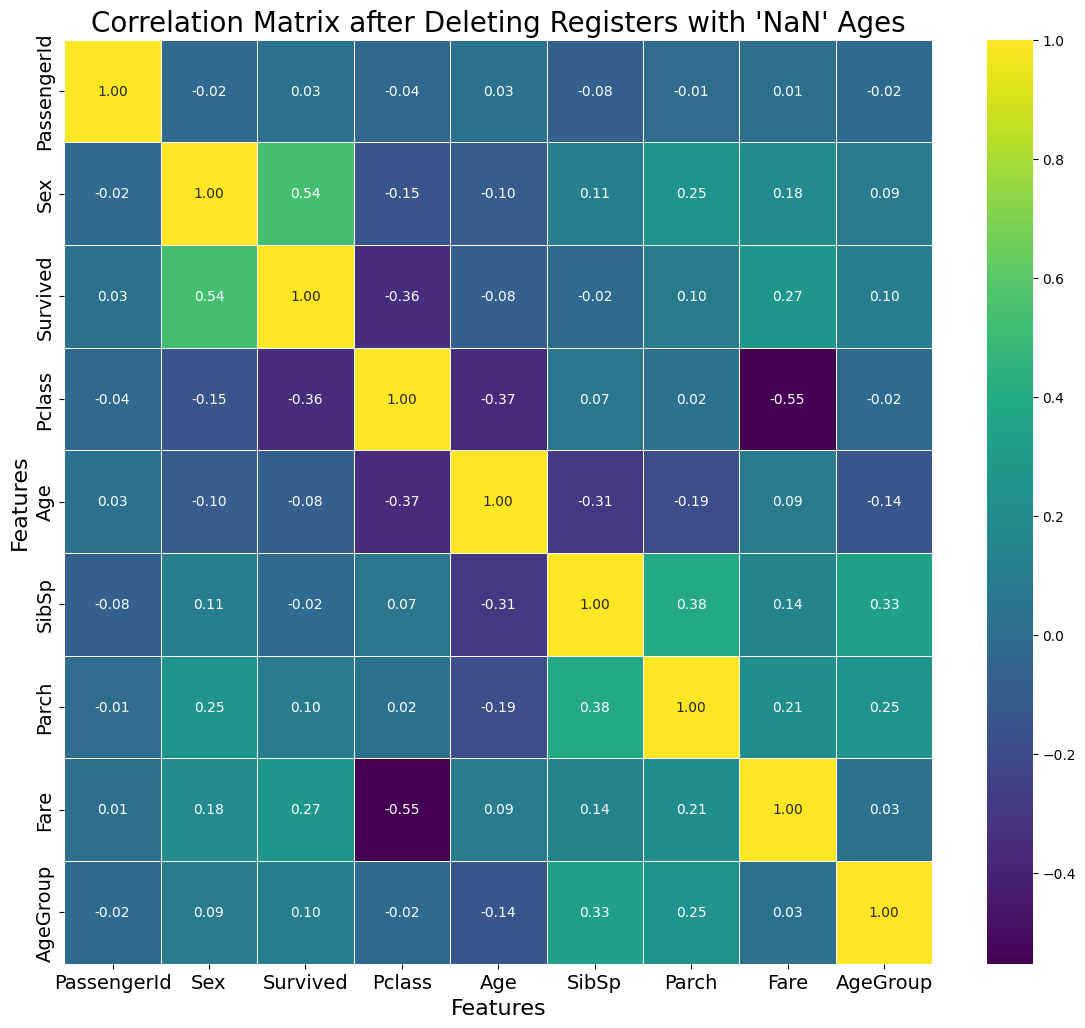

In [68]:

# Specify the columns for the correlation matrix
selected_columns = ['PassengerId', 'Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeGroup']
column_x = train_titanic_dropped_age_nan_rows[selected_columns]

# Compute the correlation matrix
corr = column_x.corr()

# Create a larger figure for the heatmap
plt.figure(figsize=(14, 12))  # Adjust the width and height as needed

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix after Deleting Registers with \'NaN\' Ages', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Increase font size of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()


In [69]:
# Feature selection (no labels)
features = ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare']# , 'Embarked'
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Hiperparameters testing:
# 1. With features = ['Sex','Pclass', 'Age', 'Fare','SibSp',	'Parch']#:          74, 6, 19 44 SVM 2nd best (no age group)
# 2. ['Sex','Pclass', 'Age', 'Fare'] : 78, 2, 28, 35 (no age group)
# 3. ['Sex','Pclass', 'Age'] : 78, 2, 30, 36 (no age group)
# 4. ['Sex','Pclass', 'AgeGroup'] ------there should be an important change after this----- (this got worse)
# 5. ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare' ]               74, 6, 18, 45 SVM best (with AgeGroup)
# 6. ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare', 'Embarked' ]#  71, 9, 16, 47 SVM (improved True negatives but True positives worsen)


In [70]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
X_train

array([[ 1.31741297, -0.28934006, -0.04201278, ...,  0.52133471,
         1.89356532, -0.09238956],
       [ 1.31741297, -0.28934006, -0.04201278, ...,  0.52133471,
        -0.48226416, -0.12995881],
       [-0.75906343, -0.28934006, -0.89577258, ..., -0.54956583,
        -0.48226416, -0.40904465],
       ...,
       [-0.75906343,  0.91237159, -0.04201278, ..., -0.54956583,
        -0.48226416, -0.51531196],
       [-0.75906343, -0.28934006,  1.66550681, ...,  0.52133471,
         0.70565058,  0.10082372],
       [-0.75906343,  0.91237159, -0.89577258, ..., -0.54956583,
        -0.48226416, -0.5367801 ]])

### Step 5: ML Model
**One proposed ML model:** Multivariable Logistic Regression (Sex, PClass and Age)

First try



Training Logistic Regression...
Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544
Classification Report:
{'0': {'precision': 0.782608695652174, 'recall': 0.9, 'f1-score': 0.8372093023255814, 'support': 80.0}, '1': {'precision': 0.8431372549019608, 'recall': 0.6825396825396826, 'f1-score': 0.7543859649122807, 'support': 63.0}, 'accuracy': 0.8041958041958042, 'macro avg': {'precision': 0.8128729752770674, 'recall': 0.7912698412698413, 'f1-score': 0.7957976336189311, 'support': 143.0}, 'weighted avg': {'precision': 0.8092751238531289, 'recall': 0.8041958041958042, 'f1-score': 0.8007206991295119, 'support': 143.0}}


Training Decision Tree...
Decision Tree Accuracy: 0.7133
Decision Tree F1 Score: 0.6555
Classification Report:
{'0': {'precision': 0.7241379310344828, 'recall': 0.7875, 'f1-score': 0.7544910179640718, 'support': 80.0}, '1': {'precision': 0.6964285714285714, 'recall': 0.6190476190476191, 'f1-score': 0.6554621848739496, 'support': 63.0}, 'accuracy': 0.7

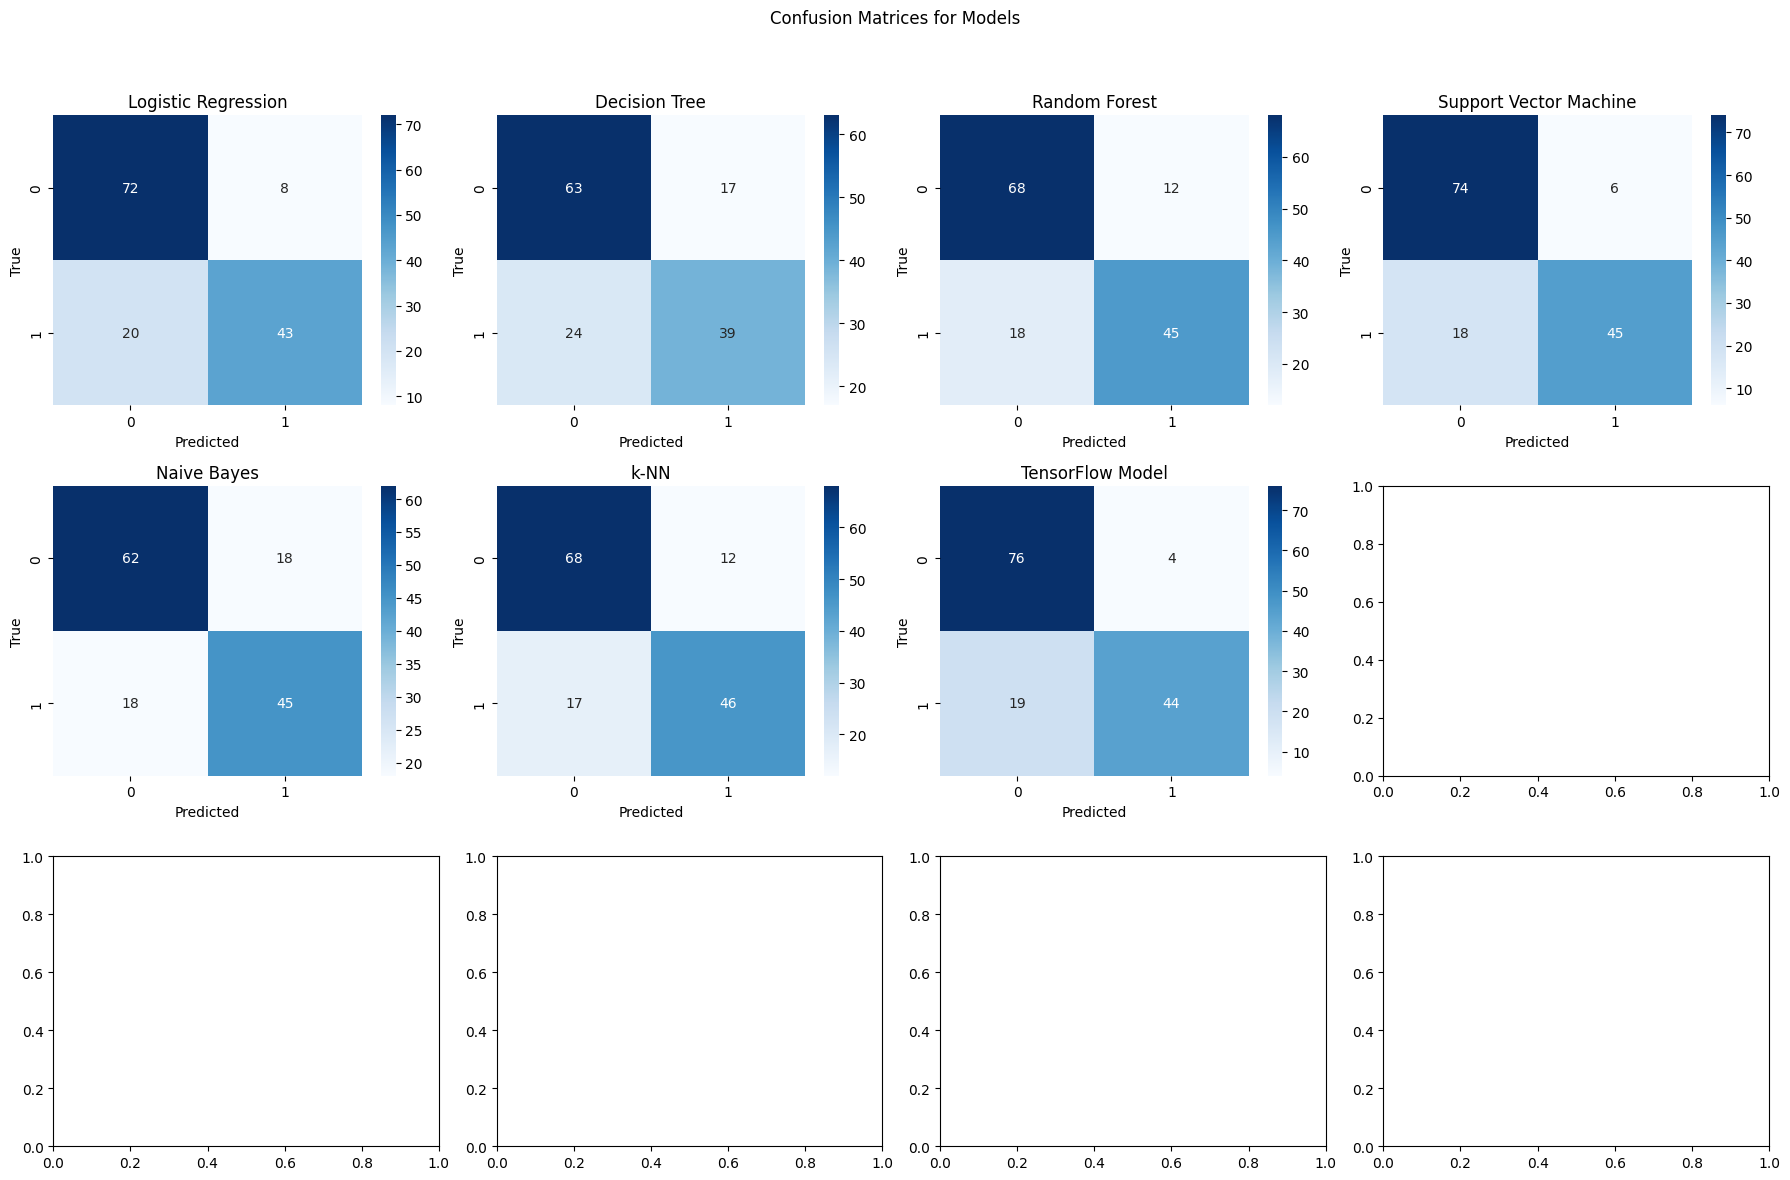

In [72]:


# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])  # TensorFlow model
}
'''
# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare'] #, 'Embarked'
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Define a function to evaluate TensorFlow models
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train, y_train, epochs=30, batch_size=70, verbose=0, validation_split=0.1) #batch 32 #epochs 25. Best: e:30 b:70.  30/75   35/90. 40/100.  60/150
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




Training Logistic Regression...
Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544
Logistic Regression ROC AUC: 0.8292
Classification Report:
{'0': {'precision': 0.782608695652174, 'recall': 0.9, 'f1-score': 0.8372093023255814, 'support': 80.0}, '1': {'precision': 0.8431372549019608, 'recall': 0.6825396825396826, 'f1-score': 0.7543859649122807, 'support': 63.0}, 'accuracy': 0.8041958041958042, 'macro avg': {'precision': 0.8128729752770674, 'recall': 0.7912698412698413, 'f1-score': 0.7957976336189311, 'support': 143.0}, 'weighted avg': {'precision': 0.8092751238531289, 'recall': 0.8041958041958042, 'f1-score': 0.8007206991295119, 'support': 143.0}}


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.8322
Support Vector Machine F1 Score: 0.7895
Support Vector Machine ROC AUC: 0.8607
Classification Report:
{'0': {'precision': 0.8043478260869565, 'recall': 0.925, 'f1-score': 0.8604651162790697, 'support': 80.0}, '1': {'precision': 0.882352941176

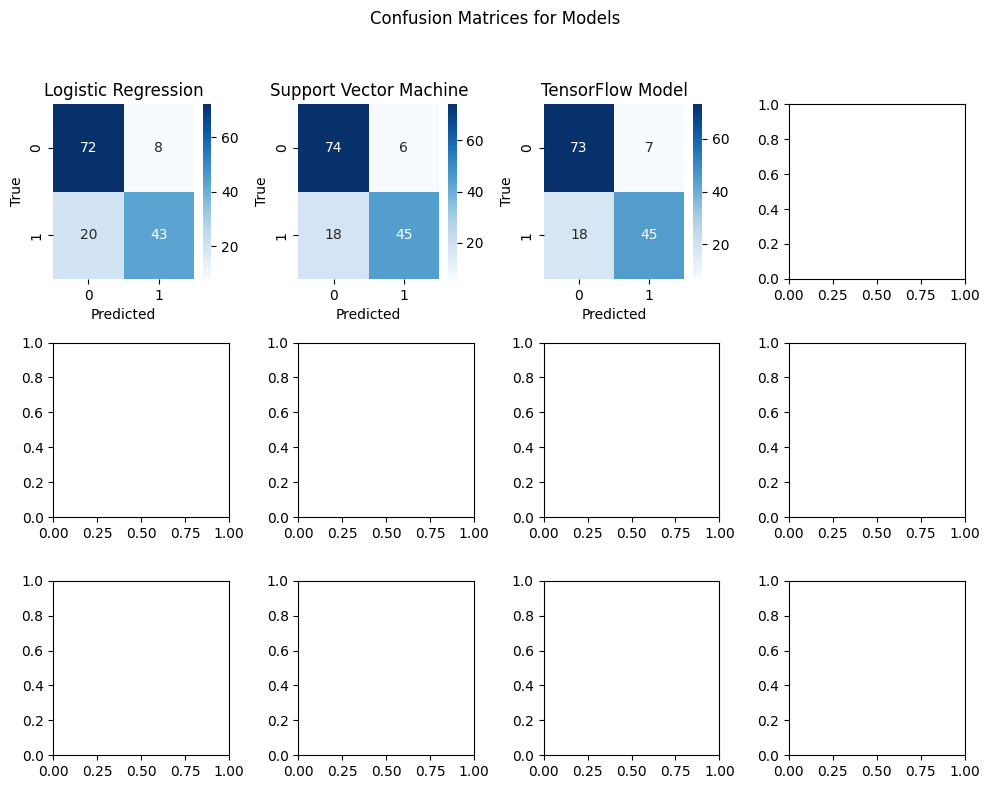

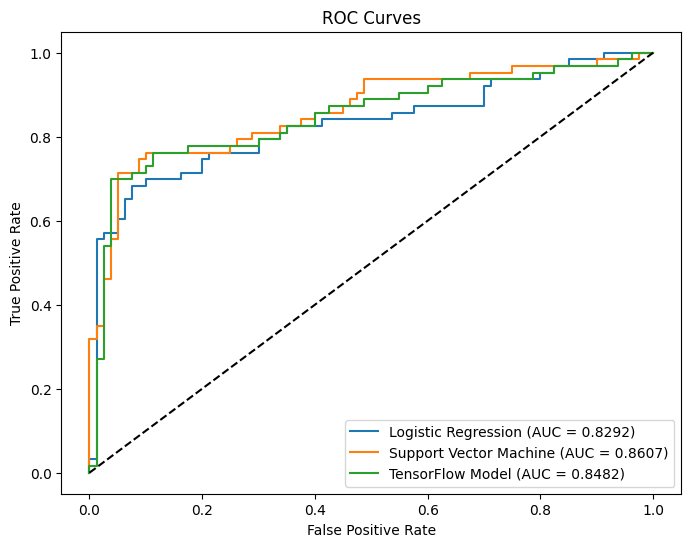

In [73]:
# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    #'Decision Tree': DecisionTreeClassifier(),
    #'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    #'Naive Bayes': GaussianNB(),
    #'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])  # TensorFlow model
}

# Define a function to evaluate TensorFlow models
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train, y_train, epochs=30, batch_size=70, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred_proba

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred_proba = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test)
        y_pred = (y_pred_proba > 0.5).astype(int)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report,
        'roc_curve': (fpr, tpr),
        'auc': auc
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} ROC AUC: {auc:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(10, 8))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, result in results.items():
    plt.plot(result['roc_curve'][0], result['roc_curve'][1], label=f'{name} (AUC = {result["auc"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()


SVM plus Tensor

Epoch 1/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2682
Epoch 2/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2233 
Epoch 3/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1906 
Epoch 4/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1808 
Epoch 5/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1407 
Epoch 6/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1504 
Epoch 7/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1038 
Epoch 8/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0487 
Epoch 9/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9771 
Epoch 10/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9085 
Epoch 11/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8689 
Epoch 12/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8438 
Epoch 13/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8030 
Epoch 14/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7619 
Epoch 15/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7616 
Epoch 16/90
5/5 ━━━━━━━━━━━━━━━━━━━

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
SVM with Autoencoder Features Accuracy: 0.8112
SVM with Autoencoder Features F1 Score: 0.7568
Classification Report:
{'0': {'precision': 0.7789473684210526, 'recall': 0.925, 'f1-score': 0.8457142857142858, 'support': 80.0}, '1': {'precision': 0.875, 'recall': 0.6666666666666666, 'f1-score': 0.7567567567567567, 'support': 63.0}, 'accuracy': 0.8111888111888111, 'macro avg': {'precision': 0.8269736842105263, 'recall': 0.7958333333333334, 'f1-score': 0.8012355212355212, 'support': 143.0}, 'weighted avg': {'precision': 0.8212642620537357, 'recall': 0.8111888111888111, 'f1-score': 0.8065232065232064, 'support': 143.0}}


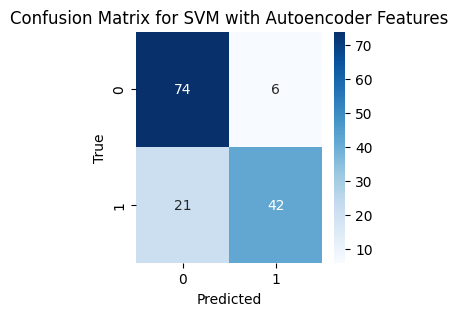

In [74]:

# Define autoencoder for feature extraction
def create_autoencoder(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))  # Encoded features
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_shape, activation='sigmoid'))  # Reconstructed data
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Define SVM model
def create_svm_model():
    return SVC(probability=True)
'''
# Load and preprocess data
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Define autoencoder and extract features
autoencoder = create_autoencoder(X_train.shape[1])
# ***************GREAT: 90 epochs and 128 batch***************
autoencoder.fit(X_train, X_train, epochs=90, batch_size=128, verbose=1)  # 60:150. 30:75. Bestt:35:90.  43:90. best:40:90   80:128.
X_train_features = autoencoder.predict(X_train)
X_test_features = autoencoder.predict(X_test)

# Train SVM model on extracted features
svm = create_svm_model()
svm.fit(X_train_features, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"SVM with Autoencoder Features Accuracy: {accuracy:.4f}")
print(f"SVM with Autoencoder Features F1 Score: {f1:.4f}")
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM with Autoencoder Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


V2 tensor and SVM

Epoch 1/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2510
Epoch 2/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2211 
Epoch 3/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2264 
Epoch 4/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1838  
Epoch 5/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1216  
Epoch 6/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0959 
Epoch 7/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0178 
Epoch 8/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9821 
Epoch 9/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9122 
Epoch 10/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8847 
Epoch 11/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8135 
Epoch 12/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8011 
Epoch 13/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7713 
Epoch 14/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7104 
Epoch 15/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6944 
Epoch 16/90
5/5 ━━━━━━━━━━━━━━━━━

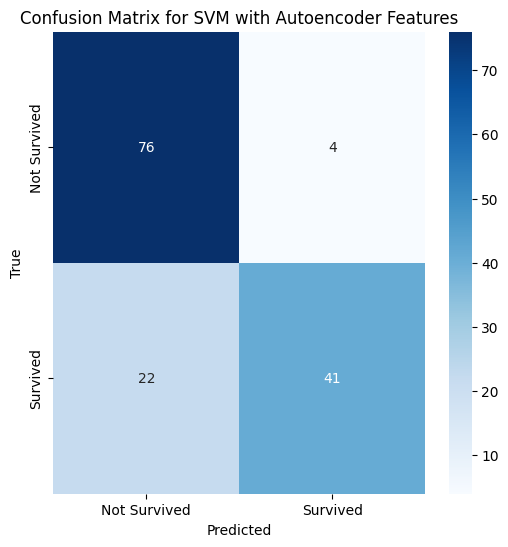

In [75]:

# Define autoencoder for feature extraction
def create_autoencoder(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))  # Encoded features
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_shape, activation='sigmoid'))  # Reconstructed data
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Define SVM model
def create_svm_model():
    return SVC(probability=True)
'''
# Load and preprocess data
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Define autoencoder and extract features
autoencoder = create_autoencoder(X_train.shape[1])
autoencoder.fit(X_train, X_train, epochs=90, batch_size=128, verbose=1)
X_train_features = autoencoder.predict(X_train)
X_test_features = autoencoder.predict(X_test)

# Train SVM model on extracted features
svm = create_svm_model()
svm.fit(X_train_features, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Print performance metrics
print(f"SVM with Autoencoder Features Accuracy: {accuracy:.4f}")
print(f"SVM with Autoencoder Features F1 Score: {f1:.4f}")

# Print formatted classification report
print("\nClassification Report:")
print(report_df.to_string(formatters={'precision': '{:.2f}'.format, 'recall': '{:.2f}'.format, 'f1-score': '{:.2f}'.format, 'support': '{:.0f}'.format}))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for SVM with Autoencoder Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM with Autoencoder (tensor) with Loss F. Graph

Epoch 1/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2344
Epoch 2/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2352 
Epoch 3/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2426 
Epoch 4/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1626 
Epoch 5/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1610 
Epoch 6/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1279 
Epoch 7/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0624 
Epoch 8/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0212 
Epoch 9/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9423 
Epoch 10/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9146 
Epoch 11/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8469 
Epoch 12/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8539 
Epoch 13/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7729 
Epoch 14/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7619 
Epoch 15/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6822 
Epoch 16/90
5/5 ━━━━━━━━━━━━━━━━━━━

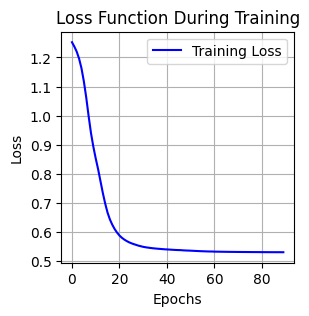

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
SVM with Autoencoder Features Accuracy: 0.8392
SVM with Autoencoder Features F1 Score: 0.7890

Classification Report:
             precision recall f1-score support
0                 0.79   0.96     0.87      80
1                 0.93   0.68     0.79      63
accuracy          0.84   0.84     0.84       1
macro avg         0.86   0.82     0.83     143
weighted avg      0.86   0.84     0.83     143


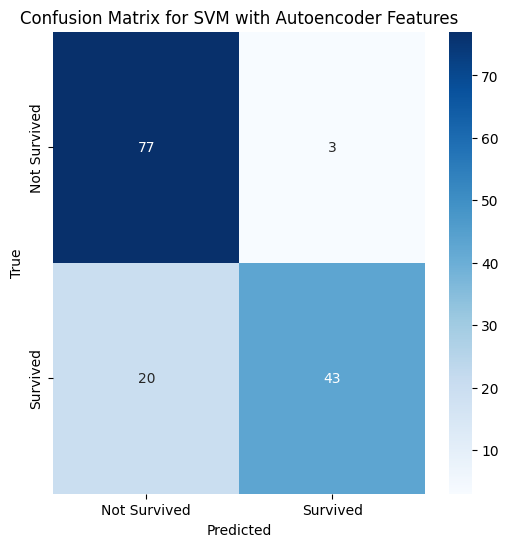

In [76]:

# Define autoencoder for feature extraction
def create_autoencoder(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))  # Encoded features
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_shape, activation='sigmoid'))  # Reconstructed data
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Define SVM model
def create_svm_model():
    return SVC(probability=True)
'''
# Load and preprocess data
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Define autoencoder and extract features
autoencoder = create_autoencoder(X_train.shape[1])

# Train autoencoder and get the history of loss
history = autoencoder.fit(X_train, X_train, epochs=90, batch_size=128, verbose=1)

# Plot the loss function
plt.figure(figsize=(3, 3))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.legend()
plt.grid(True)
plt.show()

# Extract features using the trained autoencoder
X_train_features = autoencoder.predict(X_train)
X_test_features = autoencoder.predict(X_test)

# Train SVM model on extracted features
svm = create_svm_model()
svm.fit(X_train_features, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Print performance metrics
print(f"SVM with Autoencoder Features Accuracy: {accuracy:.4f}")
print(f"SVM with Autoencoder Features F1 Score: {f1:.4f}")

# Print formatted classification report
print("\nClassification Report:")
print(report_df.to_string(formatters={'precision': '{:.2f}'.format, 'recall': '{:.2f}'.format, 'f1-score': '{:.2f}'.format, 'support': '{:.0f}'.format}))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for SVM with Autoencoder Features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM with Kfold (not useful)

Average Accuracy: 0.8132 ± 0.0265
Average F1 Score: 0.7422 ± 0.0439

Classification Report for Last Fold:
              precision    recall  f1-score     support
0              0.722222  0.970149  0.828025   67.000000
1              0.928571  0.509804  0.658228   51.000000
accuracy       0.771186  0.771186  0.771186    0.771186
macro avg      0.825397  0.739977  0.743127  118.000000
weighted avg   0.811407  0.771186  0.754638  118.000000


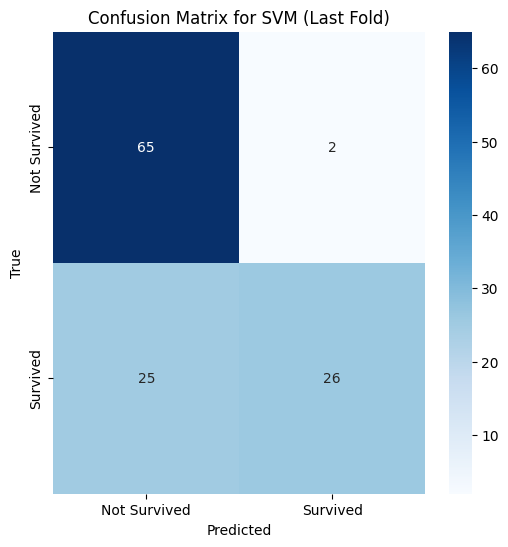

In [77]:

# Load and preprocess data
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare'] #, 'Embarked'
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cross-validation setup
kf = KFold(n_splits=6, shuffle=True, random_state=42)  # 5-fold cross-validation
accuracy_list = []
f1_list = []
conf_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define and train SVM model
    svm = SVC(probability=True)  # You can set additional hyperparameters if needed
    svm.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = svm.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Print average performance metrics
print(f"Average Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")

# Aggregate and print overall classification report
# Note: Averaging classification reports is not straightforward; usually, it's better to report metrics individually
# Here, we show the report from the last fold for demonstration purposes
last_conf_matrix = conf_matrices[-1]
last_report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report for Last Fold:")
print(pd.DataFrame(last_report).transpose())

# Plot confusion matrix for the last fold
plt.figure(figsize=(6, 6))
sns.heatmap(last_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for SVM (Last Fold)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


hyperparameter test of Tensorflow

all models with hyperparameters tuning

Trial 104 Complete [00h 00m 04s]
val_accuracy: 0.800000011920929

Best val_accuracy So Far: 0.8999999761581421
Total elapsed time: 00h 08m 02s
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Training Logistic Regression...
Logistic Regression Accuracy: 0.7627
Logistic Regression F1 Score: 0.6818
Classification Report:
{'0': {'precision': 0.7407407407407407, 'recall': 0.8955223880597015, 'f1-score': 0.8108108108108107, 'support': 67.0}, '1': {'precision': 0.8108108108108109, 'recall': 0.5882352941176471, 'f1-score': 0.6818181818181819, 'support': 51.0}, 'accuracy': 0.7627118644067796, 'macro avg': {'precision': 0.7757757757757757, 'recall': 0.7418788410886743, 'f1-score': 0.7463144963144963, 'support': 118.0}, 'weighted avg': {'precision': 0.7710252625506863, 'recall': 0.7627118644067796, 'f1-score': 0.7550597592970475, 'support': 118.0}}


Training Decision Tree...
Decision Tree Accuracy: 0.7119
Decision Tree F1 Score: 0.6600
Classification Report:
{'0': {'precision': 0.7391304347826086, 'reca

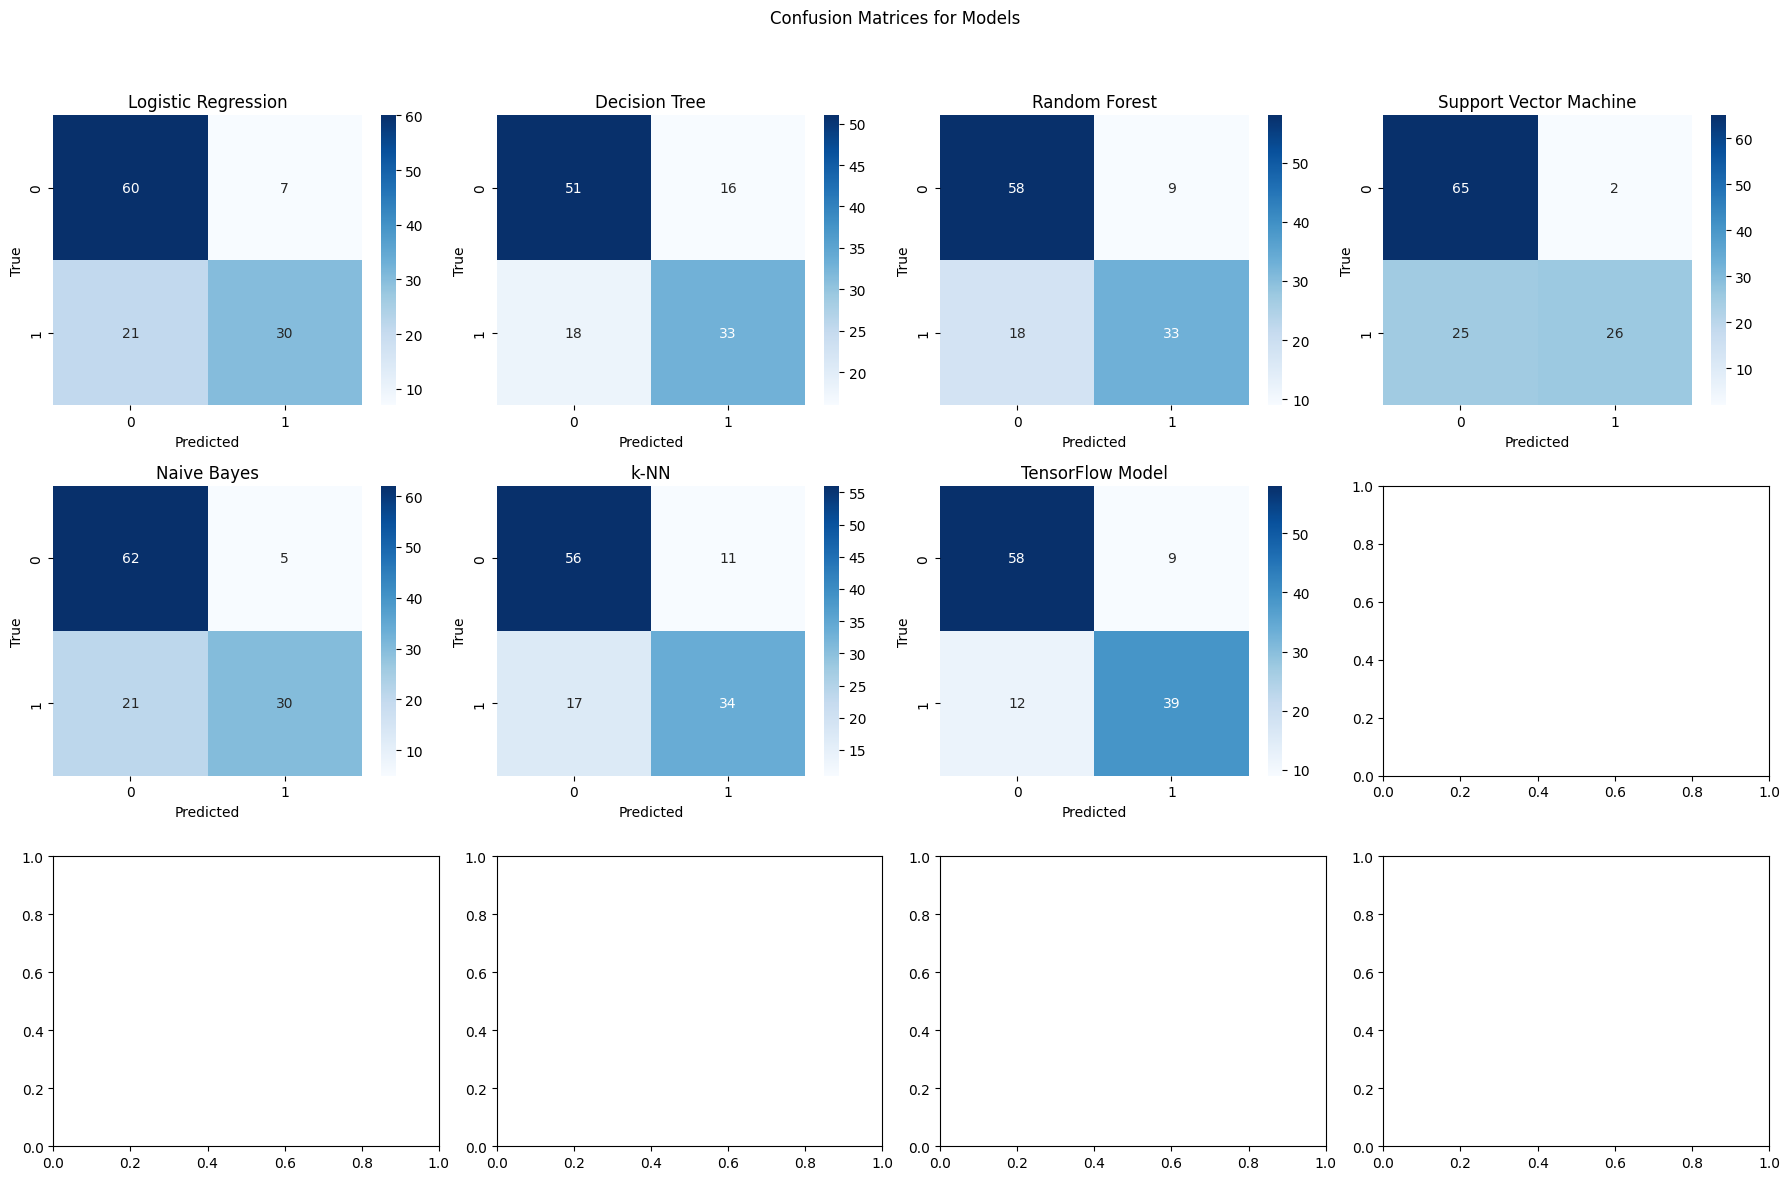

In [78]:
# Define the model builder function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2,
    directory='kt_dir',
    project_name='titanic_model_tuning'
)

# Define a function to evaluate TensorFlow models with Keras Tuner
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=20, validation_split=0.1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
accuracy, f1, y_pred = evaluate_tensorflow_model(best_model, X_train, X_test, y_train, y_test)

# Define other models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': best_model  # TensorFlow model with best hyperparameters
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


all models with hyperparameters tuning (v2.0)

Reloading Tuner from kt_dir/titanic_model_tuning/tuner0.json
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Training Logistic Regression...
Logistic Regression Accuracy: 0.7627
Logistic Regression F1 Score: 0.6818
Classification Report:
{'0': {'precision': 0.7407407407407407, 'recall': 0.8955223880597015, 'f1-score': 0.8108108108108107, 'support': 67.0}, '1': {'precision': 0.8108108108108109, 'recall': 0.5882352941176471, 'f1-score': 0.6818181818181819, 'support': 51.0}, 'accuracy': 0.7627118644067796, 'macro avg': {'precision': 0.7757757757757757, 'recall': 0.7418788410886743, 'f1-score': 0.7463144963144963, 'support': 118.0}, 'weighted avg': {'precision': 0.7710252625506863, 'recall': 0.7627118644067796, 'f1-score': 0.7550597592970475, 'support': 118.0}}


Training Decision Tree...
Decision Tree Accuracy: 0.6949
Decision Tree F1 Score: 0.6250
Classification Report:
{'0': {'precision': 0.7123287671232876, 'recall': 0.7761194029850746, 'f1-score': 0.7428571428571429, 'support': 67.0}, '1': {'

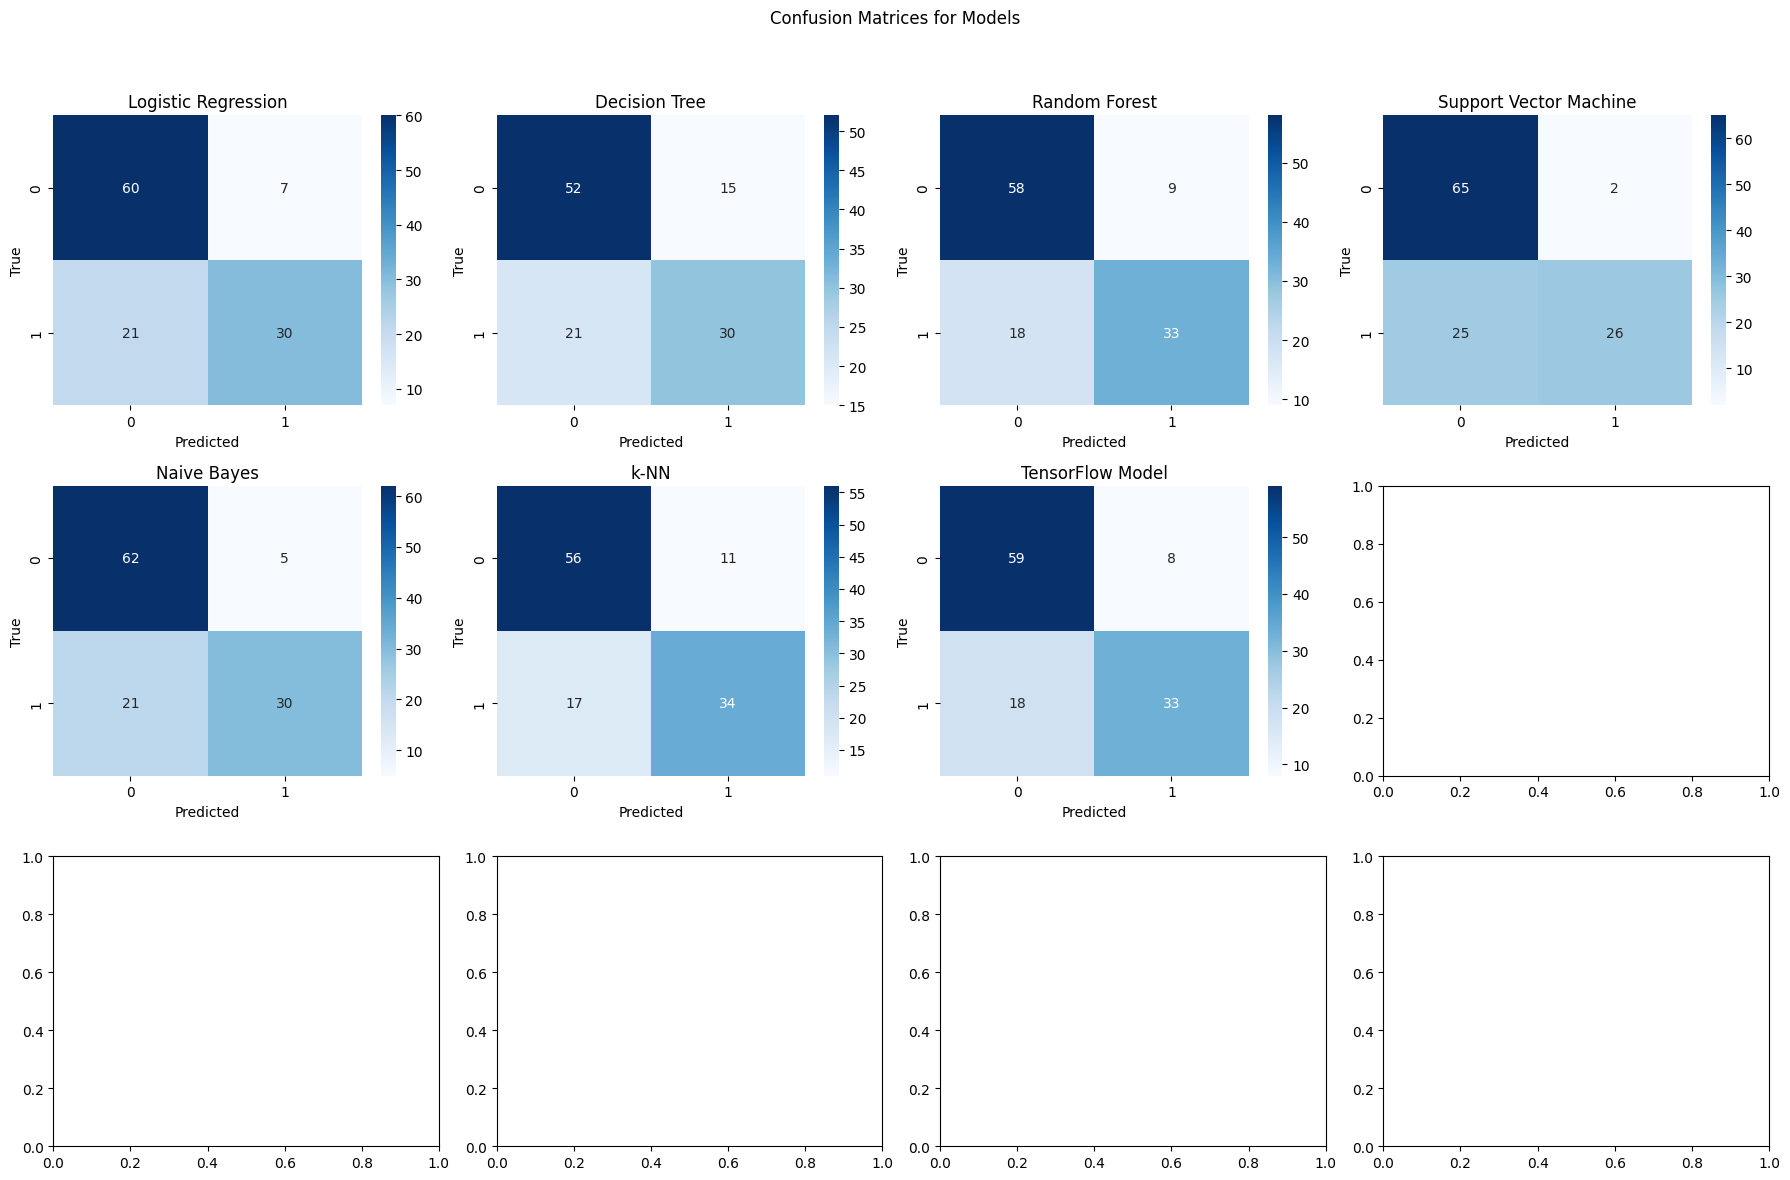

In [79]:
# Define the model builder function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Keras Tuner with the build function
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,  # Set maximum epochs for tuning
    hyperband_iterations=2,
    directory='kt_dir',
    project_name='titanic_model_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=30, validation_split=0.1)

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]

# Define a fixed number of epochs for evaluation
fixed_epochs = 30

# Define a function to evaluate TensorFlow models with the fixed number of epochs
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test, epochs):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred

# Evaluate the best model with the fixed number of epochs
accuracy, f1, y_pred = evaluate_tensorflow_model(best_model, X_train, X_test, y_train, y_test, fixed_epochs)

# Define other models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': best_model  # TensorFlow model with best hyperparameters
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test, fixed_epochs)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


with loss function



Training Logistic Regression...
Logistic Regression Accuracy: 0.7627
Logistic Regression F1 Score: 0.6818
Classification Report:
{'0': {'precision': 0.7407407407407407, 'recall': 0.8955223880597015, 'f1-score': 0.8108108108108107, 'support': 67.0}, '1': {'precision': 0.8108108108108109, 'recall': 0.5882352941176471, 'f1-score': 0.6818181818181819, 'support': 51.0}, 'accuracy': 0.7627118644067796, 'macro avg': {'precision': 0.7757757757757757, 'recall': 0.7418788410886743, 'f1-score': 0.7463144963144963, 'support': 118.0}, 'weighted avg': {'precision': 0.7710252625506863, 'recall': 0.7627118644067796, 'f1-score': 0.7550597592970475, 'support': 118.0}}


Training Decision Tree...
Decision Tree Accuracy: 0.7034
Decision Tree F1 Score: 0.6392
Classification Report:
{'0': {'precision': 0.7222222222222222, 'recall': 0.7761194029850746, 'f1-score': 0.7482014388489208, 'support': 67.0}, '1': {'precision': 0.6739130434782609, 'recall': 0.6078431372549019, 'f1-score': 0.6391752577319587, 'supp

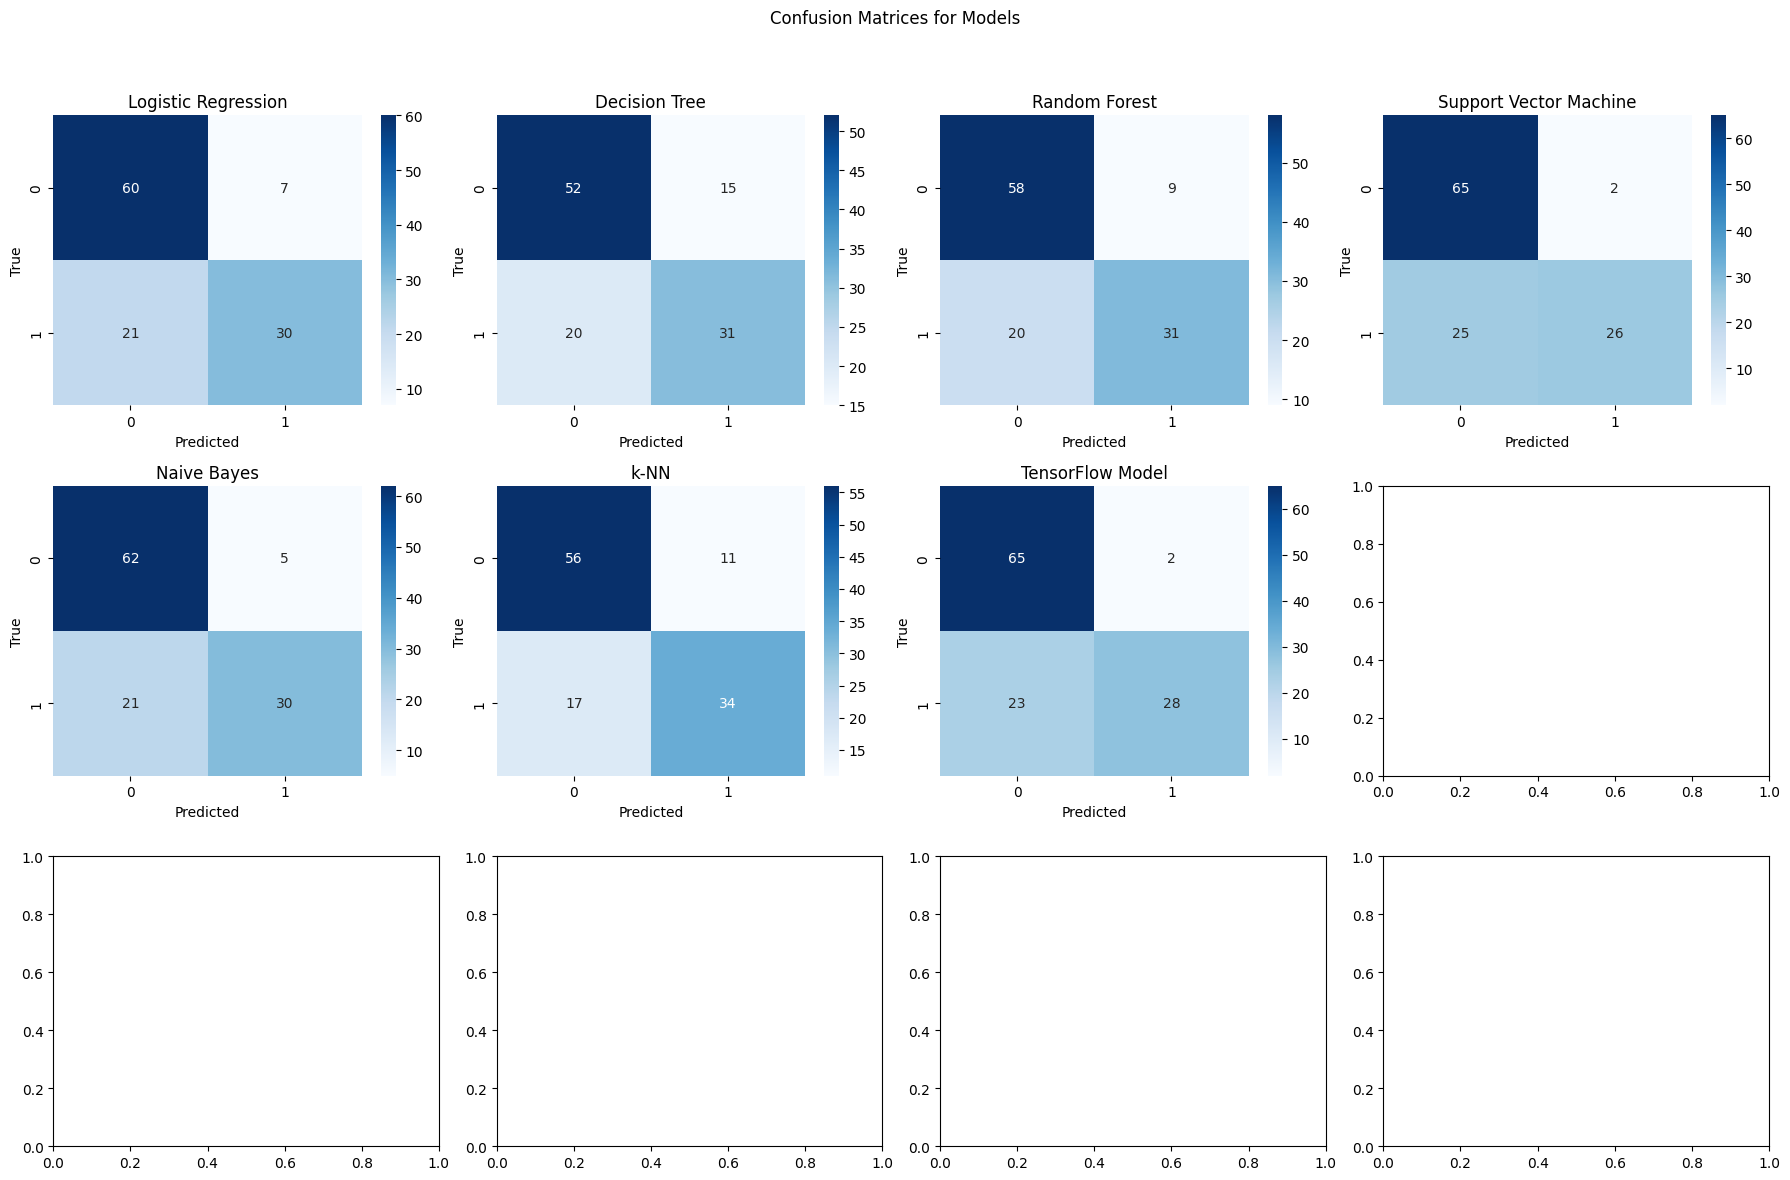

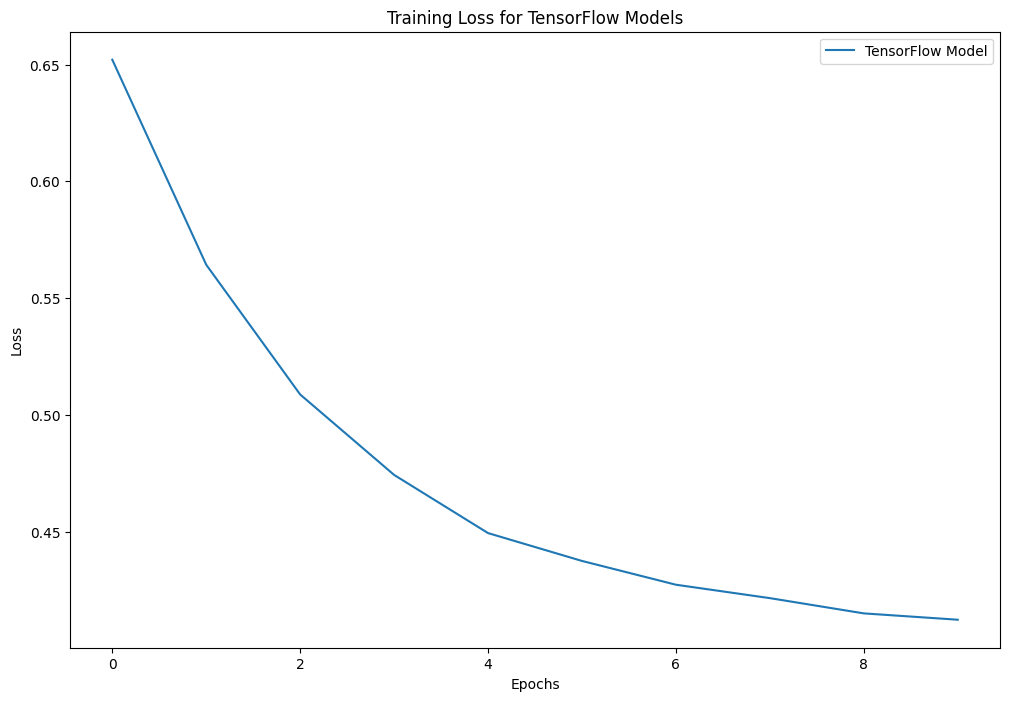

In [80]:
# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])  # TensorFlow model
}
'''
# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Define a function to evaluate TensorFlow models and track cost
def evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred, history.history['loss']

# Train models and evaluate
results = {}
losses = {}  # To store loss values for plotting

for name, model in models.items():
    print(f"\n\nTraining {name}...")

    if name == 'TensorFlow Model':
        accuracy, f1, y_pred, loss = evaluate_tensorflow_model(model, X_train, X_test, y_train, y_test)
        # Store losses for plotting
        losses[name] = loss
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        loss = []  # No loss tracking for scikit-learn models

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': report
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot training losses for models
plt.figure(figsize=(12, 8))
for name, loss in losses.items():
    plt.plot(loss, label=name)

plt.title('Training Loss for TensorFlow Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


With cross validation



Evaluating Logistic Regression with Cross-Validation...
Logistic Regression Cross-Validated Accuracy: 0.7908
Logistic Regression Cross-Validated F1 Score: 0.7243


Evaluating Decision Tree with Cross-Validation...
Decision Tree Cross-Validated Accuracy: 0.7417
Decision Tree Cross-Validated F1 Score: 0.6756


Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validated Accuracy: 0.7891
Random Forest Cross-Validated F1 Score: 0.7405


Evaluating Support Vector Machine with Cross-Validation...
Support Vector Machine Cross-Validated Accuracy: 0.8031
Support Vector Machine Cross-Validated F1 Score: 0.7316


Evaluating Naive Bayes with Cross-Validation...
Naive Bayes Cross-Validated Accuracy: 0.7698
Naive Bayes Cross-Validated F1 Score: 0.6918


Evaluating k-NN with Cross-Validation...
k-NN Cross-Validated Accuracy: 0.8084
k-NN Cross-Validated F1 Score: 0.7531


Evaluating TensorFlow Model with Cross-Validation...


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


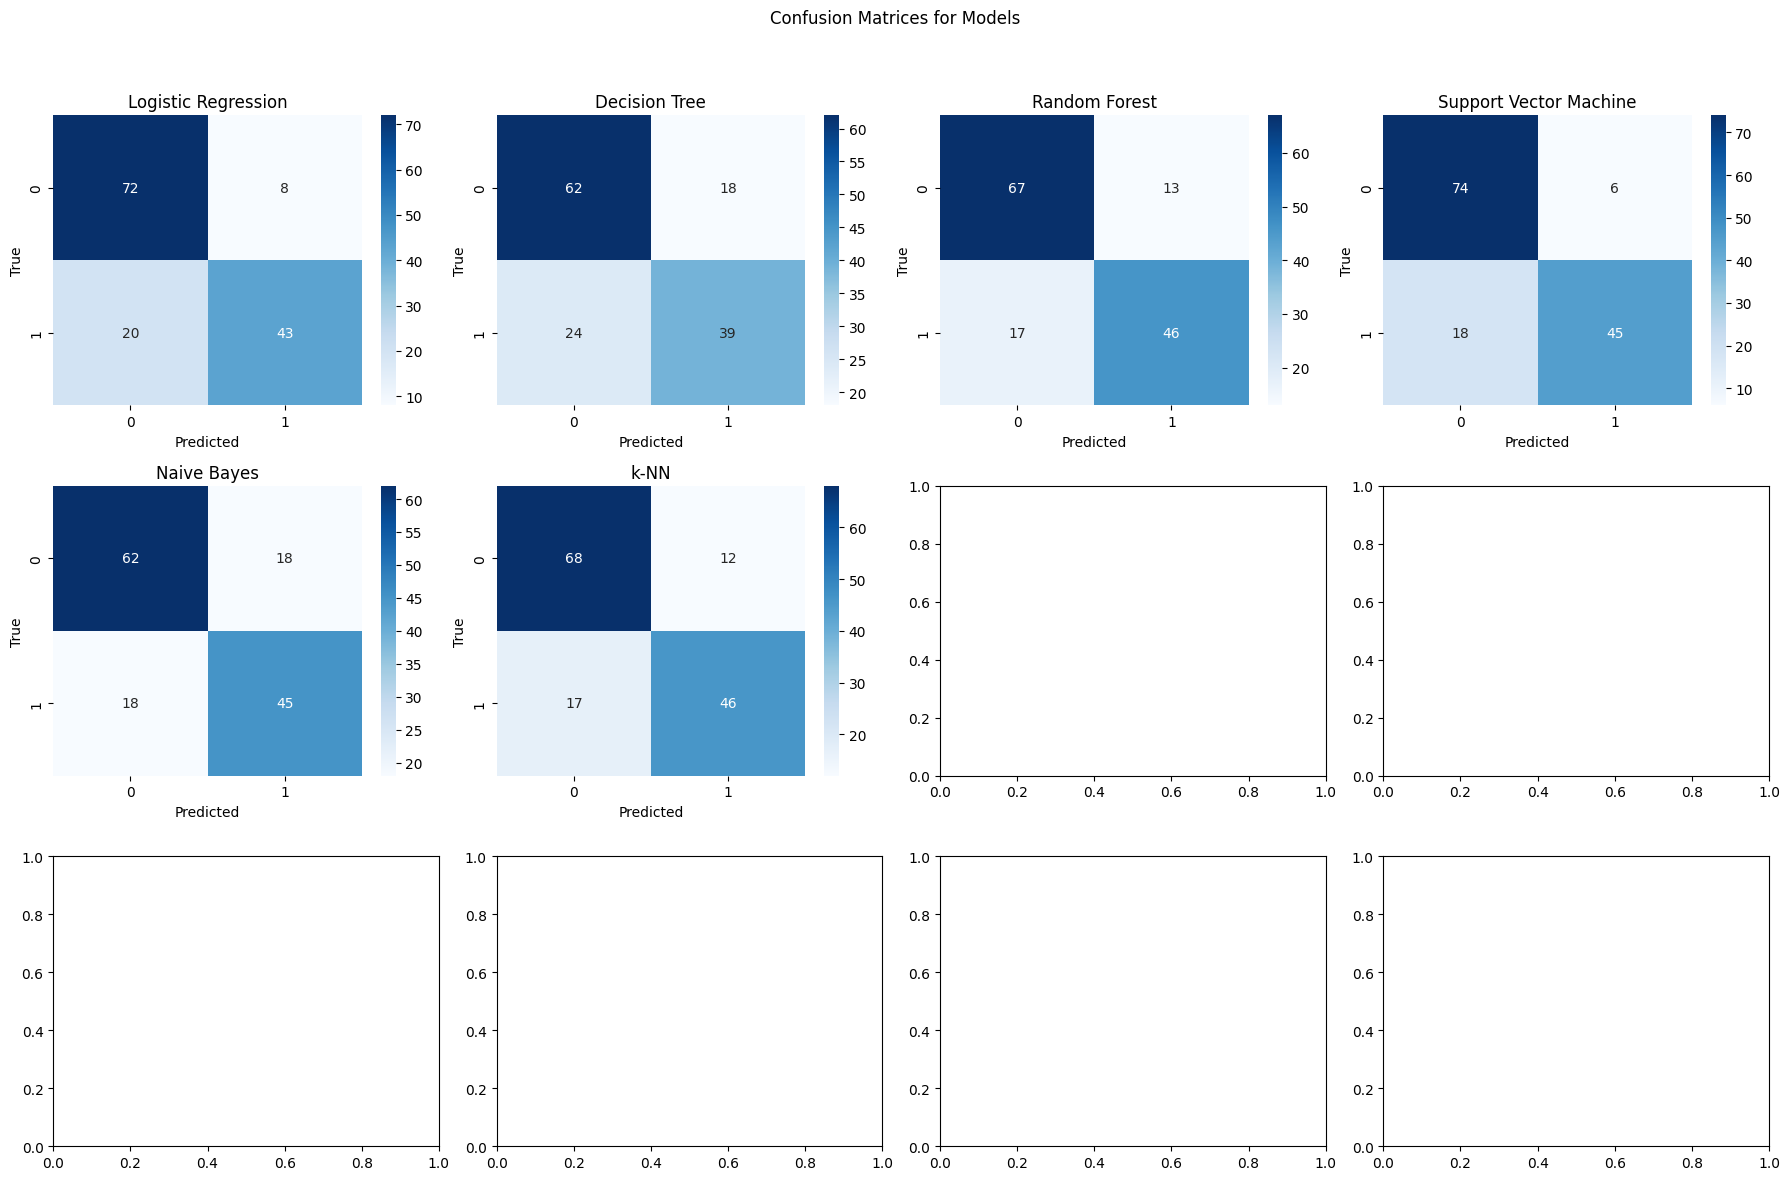

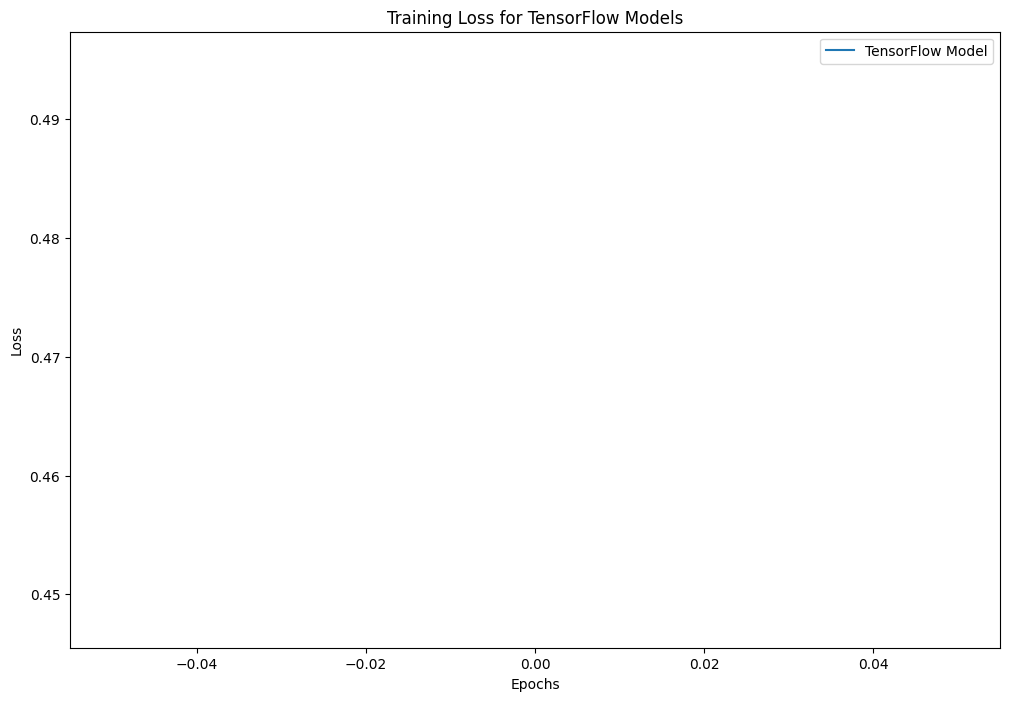

In [81]:
# Define TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'TensorFlow Model': create_tensorflow_model(X_train.shape[1])
}

# Feature selection and preprocessing
features = ['Sex', 'Pclass', 'AgeGroup', 'Age', 'SibSp', 'Parch', 'Fare'] #, 'Embarked'
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to evaluate TensorFlow models and track cost
def evaluate_tensorflow_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1, y_pred, history.history['loss']

# Train and evaluate models with cross-validation
results = {}
losses = {}  # To store loss values for plotting

for name, model in models.items():
    print(f"\n\nEvaluating {name} with Cross-Validation...")

    if name == 'TensorFlow Model':
        # For TensorFlow models, perform cross-validation manually
        accuracies = []
        f1_scores = []
        losses_list = []

        for train_idx, val_idx in cv.split(X_train):
            X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
            y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            tf_model = create_tensorflow_model(X_train.shape[1])
            accuracy, f1, _, loss = evaluate_tensorflow_model(tf_model, X_train_cv, y_train_cv, X_val_cv, y_val_cv)

            accuracies.append(accuracy)
            f1_scores.append(f1)
            losses_list.append(loss)

        # Average results
        avg_accuracy = np.mean(accuracies)
        avg_f1 = np.mean(f1_scores)
        avg_loss = np.mean(np.concatenate(losses_list))  # Flatten and average losses

        # Store losses for plotting
        losses[name] = avg_loss

    else:
        # Perform cross-validation for scikit-learn models
        accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

        model.fit(X_train, y_train)  # Fit on the whole training set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        results[name] = {
            'accuracy': np.mean(accuracy_scores),
            'f1_score': np.mean(f1_scores),
            'confusion_matrix': conf_matrix,
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }

        print(f"{name} Cross-Validated Accuracy: {np.mean(accuracy_scores):.4f}")
        print(f"{name} Cross-Validated F1 Score: {np.mean(f1_scores):.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot training losses for TensorFlow models
plt.figure(figsize=(12, 8))
for name, loss in losses.items():
    plt.plot(loss, label=name)

plt.title('Training Loss for TensorFlow Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Very simple, yet interesting custom model

In [82]:
import random

class CustomizedModel():
    def __init__(self):
        pass

    # Do nothing only necesary for format that call that function in all our models
    def fit(self, X, y):
        pass

    # If the passenger is female survals
    def predict(self, X):
        array = np.zeros(len(X))

        for i in range(len(X)):
            if X[i, 0].astype(int) == 1:
                if X[i, 1] < 3:
                    array[i] = 1
                else:
                    array[i] = random.randint(0, 1) >= 0.5
            else:
                array[i] = 0

        return array


VERY NICE initial tests

In [83]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    #'Customized Model': CustomizedModel()
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")





Training Logistic Regression...
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143

Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544


Training Decision Tree...
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        80
           1       0.68      0.62      0.65        63

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.70      0.71      0.70       143

Decision Tree Accuracy: 0.7063
Decision Tree F1 Score: 0.6500


Training Random Forest...
Classification Report for Random F

NICE tests with cross validation

In [84]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    #'Customized Model': CustomizedModel()
}

# Initialize KFold cross-validator
kf = KFold(n_splits=20, shuffle=True, random_state=42)  # Adjust number of splits as needed

# Create a custom scoring function if needed
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1'
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Calculate average scores
    avg_accuracy = cv_results['test_accuracy'].mean()
    avg_f1 = cv_results['test_f1'].mean()

    # Train the model on the whole training set and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'cv_accuracy': avg_accuracy,
        'cv_f1': avg_f1,
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Cross-Validated Accuracy: {avg_accuracy:.4f}")
    print(f"{name} Cross-Validated F1 Score: {avg_f1:.4f}")
    print(f"{name} Test Accuracy: {accuracy:.4f}")
    print(f"{name} Test F1 Score: {f1:.4f}")





Training Logistic Regression...
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143

Logistic Regression Cross-Validated Accuracy: 0.8077
Logistic Regression Cross-Validated F1 Score: 0.7465
Logistic Regression Test Accuracy: 0.8042
Logistic Regression Test F1 Score: 0.7544


Training Decision Tree...
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        80
           1       0.67      0.62      0.64        63

    accuracy                           0.70       143
   macro avg       0.70      0.69      0.69       143
weighted avg       0.70      0.70      0.70       143

Decision

hyperparameters with Logistic Regression

In [85]:

# Define the model
log_reg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300, 400, 500]  # Number of iterations
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Optionally, you can evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8050
Test Accuracy: 0.8042
Test F1 Score: 0.7544


Avoid running, SVM with Hypeparameters tuning takes way too long


In [86]:
'''
# Define the model
svm = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel function
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10, 100],  # Kernel coefficient
    'degree': [3, 4, 5],  # Degree of polynomial kernel function
    'coef0': [0.0, 0.1, 1.0]  # Independent term in kernel function
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Optionally, you can evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
'''

'\n# Define the model\nsvm = SVC()\n\n# Define the parameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100, 1000],  # Regularization parameter\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],  # Kernel function\n    \'gamma\': [\'scale\', \'auto\'] + [0.001, 0.01, 0.1, 1, 10, 100],  # Kernel coefficient\n    \'degree\': [3, 4, 5],  # Degree of polynomial kernel function\n    \'coef0\': [0.0, 0.1, 1.0]  # Independent term in kernel function\n}\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring=\'accuracy\', cv=5, n_jobs=-1, verbose=1)\n\n# Fit GridSearchCV\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(f"Best Parameters: {best_params}")\nprint(f"Best Cross-Validated Accuracy: {best_score:.4f}")\n\n# Optionally, you can evaluate the best model on the test set\nbest_model = grid_search.best_estimator_\ny_pr

Logistic Regression with Hyperparameters tuning

In [102]:
# Define the model
log_reg = LogisticRegression()

# Define the parameter distribution
param_dist = {
    'C': uniform(loc=0.001, scale=100),  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300, 400, 500]  # Number of iterations
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Optionally, you can evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 33.371861113902185, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8015
Test Accuracy: 0.8042
Test F1 Score: 0.7544


Logistic Regression Graph

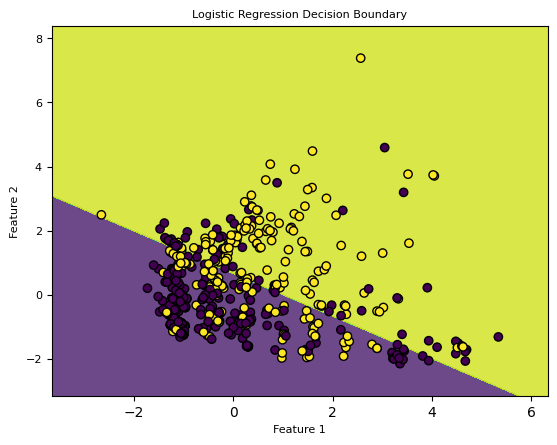

In [103]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with Logistic Regression:
# For this, you might need to reduce your feature space to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_reduced, y_train)

plot_decision_boundary(log_reg, X_reduced, y_train, title="Logistic Regression Decision Boundary")


Decision tree graph

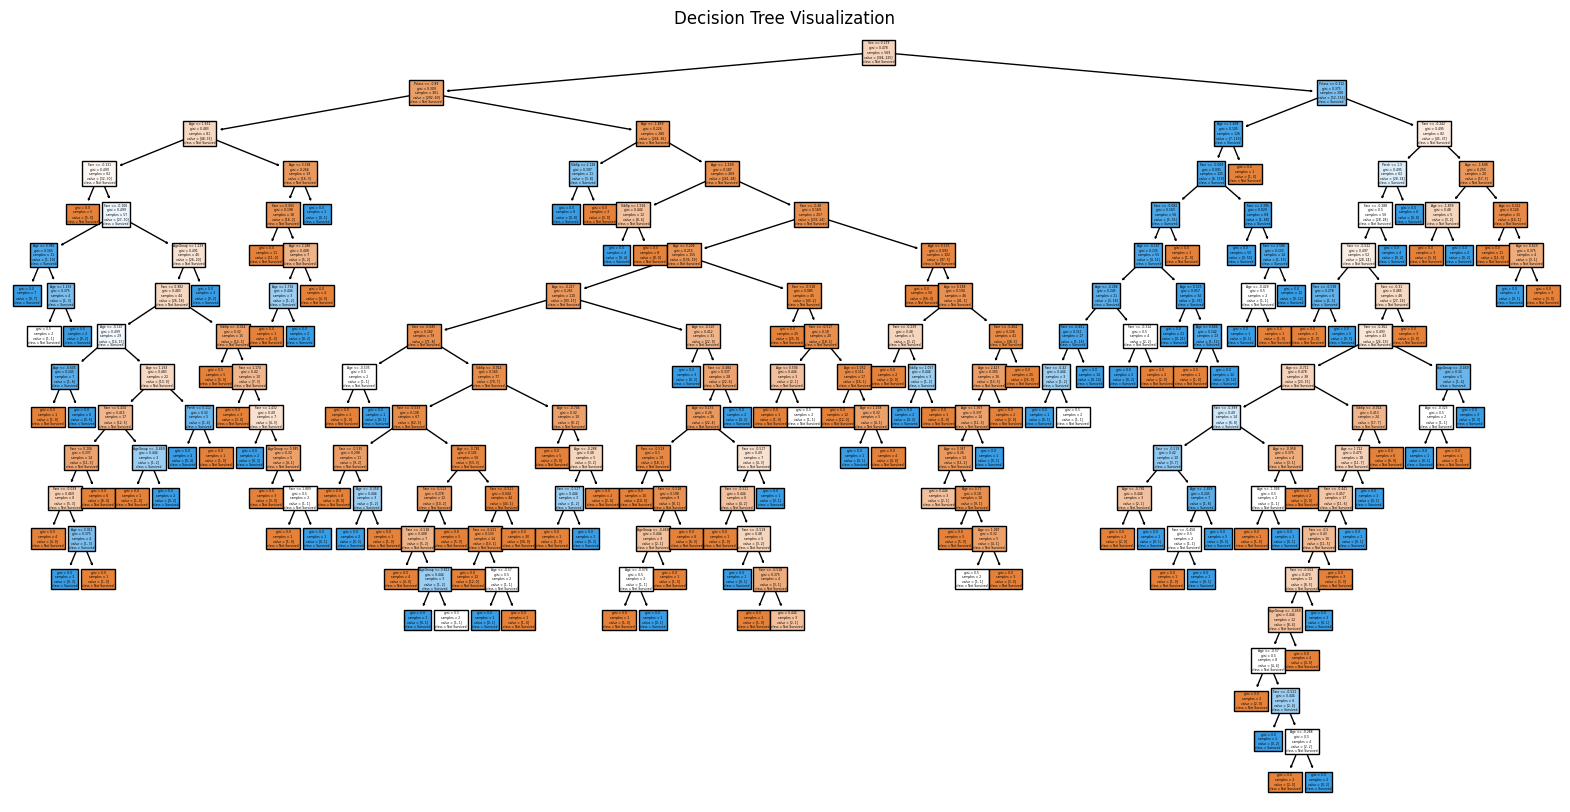

In [89]:
from sklearn.tree import plot_tree

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Visualization")
plt.show()


SVM graph

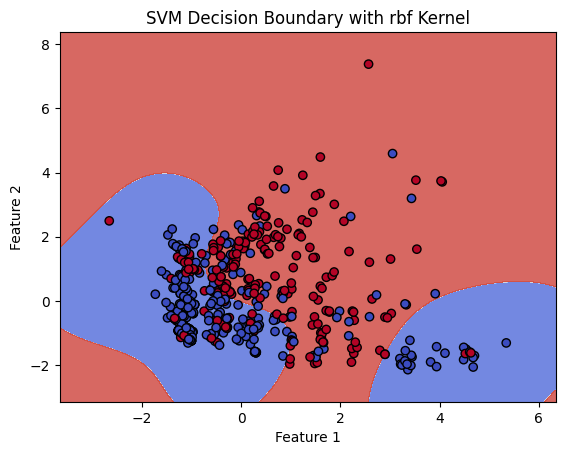

In [90]:
def plot_svm_decision_boundary(clf, X, y, title="SVM Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with SVM:
svm = SVC(kernel='rbf')
svm.fit(X_reduced, y_train)

plot_svm_decision_boundary(svm, X_reduced, y_train, title="SVM Decision Boundary with rbf Kernel")


Random forest Importances Graph

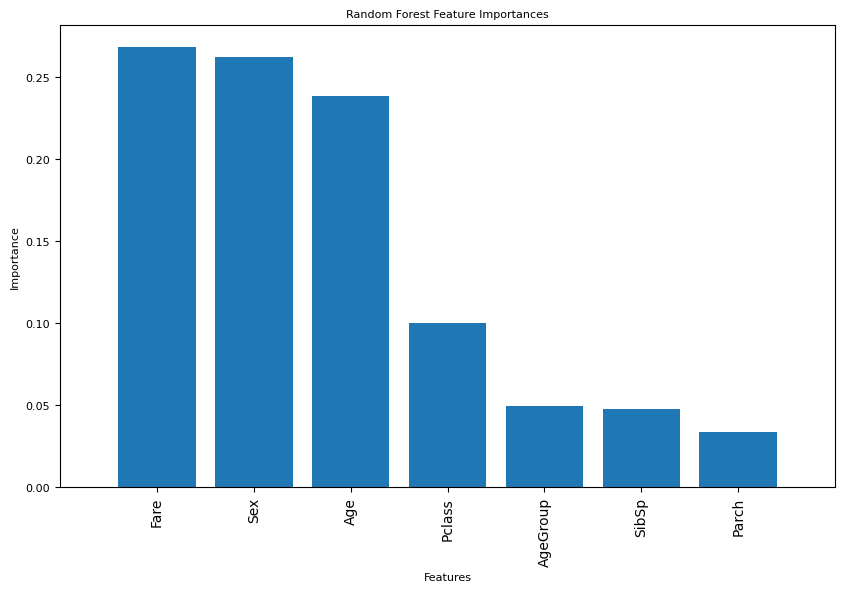

In [104]:
# Define feature names manually
feature_names = ['Sex','Pclass', 'AgeGroup', 'Age','SibSp',	'Parch', 'Fare']  # Replace with actual feature names

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


SVM with Linear kernel test Graph

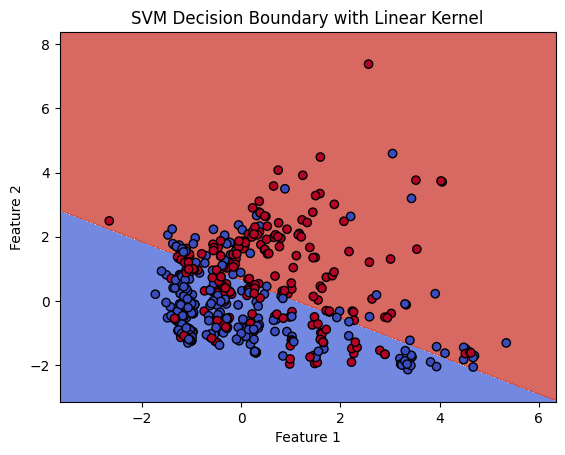

In [92]:
def plot_svm_decision_boundary(clf, X, y, title="SVM Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with SVM:
svm = SVC(kernel='linear')
svm.fit(X_reduced, y_train)

plot_svm_decision_boundary(svm, X_reduced, y_train, title="SVM Decision Boundary with Linear Kernel")


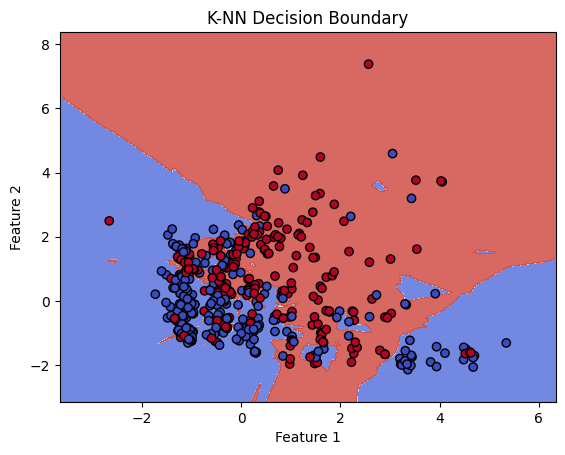

In [93]:
def plot_knn_decision_boundary(clf, X, y, title="K-NN Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example with K-NN:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_reduced, y_train)

plot_knn_decision_boundary(knn, X_reduced, y_train, title="K-NN Decision Boundary")


NICE with Kernel trick

Kernel RBF test (worked fine)

In [94]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM with Linear Kernel': SVC(kernel='linear', probability=True),
    'SVM with Polynomial Kernel': SVC(kernel='poly', degree=3, coef0=1, probability=True),
    'SVM with RBF Kernel': SVC(kernel='rbf', gamma='scale', probability=True),  # Default gamma='scale'
    'SVM with Sigmoid Kernel': SVC(kernel='sigmoid', gamma='scale', coef0=1, probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")





Training Logistic Regression...
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143

Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544


Training Decision Tree...
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        80
           1       0.67      0.59      0.63        63

    accuracy                           0.69       143
   macro avg       0.69      0.68      0.68       143
weighted avg       0.69      0.69      0.69       143

Decision Tree Accuracy: 0.6923
Decision Tree F1 Score: 0.6271


Training Random Forest...
Classification Report for Random F

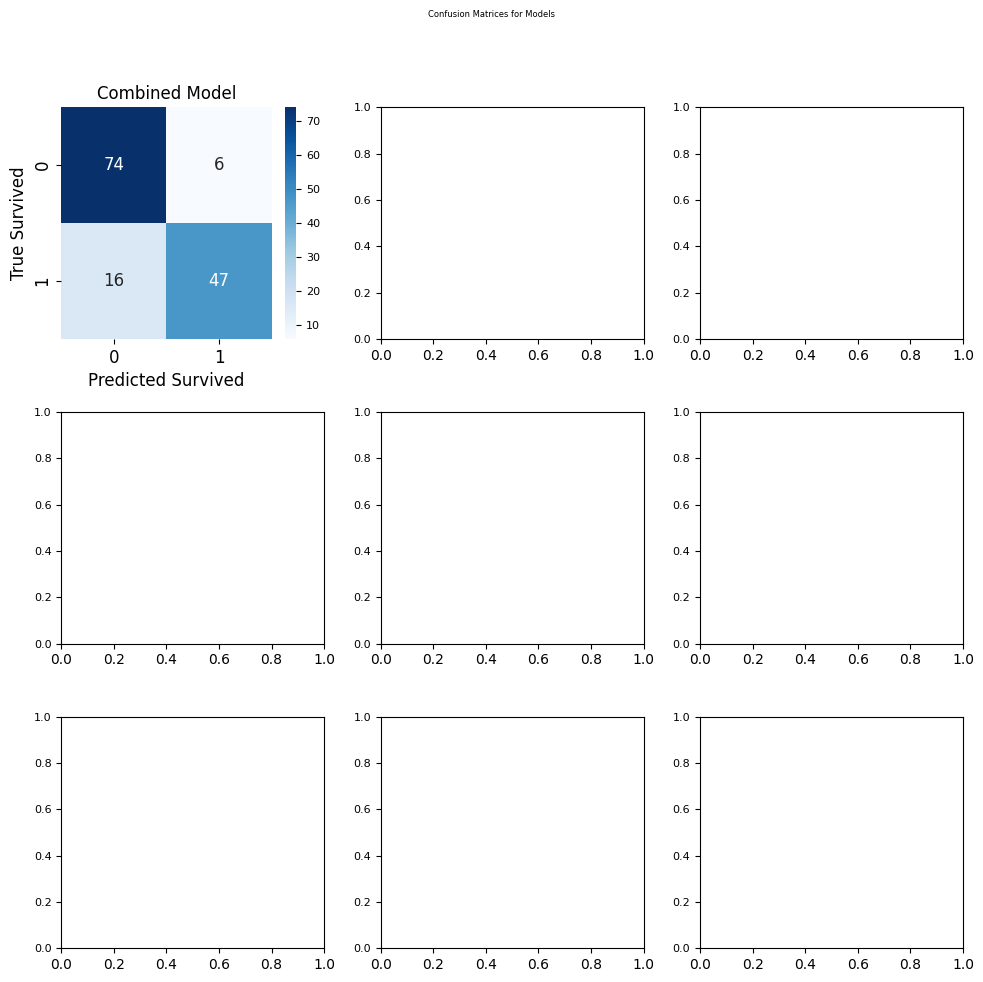

In [105]:
# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Confusion Matrices for Models', fontsize=6)


# Set global font sizes
plt.rcParams.update({
    'font.size': 12,  # Default font size
    'axes.titlesize': 8,  # Title size for axes
    'axes.labelsize': 8,  # Label size for axes
    'xtick.labelsize': 10,  # Size for x-axis tick labels
    'ytick.labelsize': 8,  # Size for y-axis tick labels
    'legend.fontsize': 8,  # Size for legend
    'figure.titlesize': 8  # Title size for the figure
})

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel('Predicted Survived', fontsize=12)
    ax.set_ylabel('True Survived', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

this was a test of SVC with KNN

Combined Model Accuracy: 0.8251748251748252
Combined Model F1 Score: 0.7899159663865546
Confusion Matrix:
[[71  9]
 [16 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        80
           1       0.84      0.75      0.79        63

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.82       143



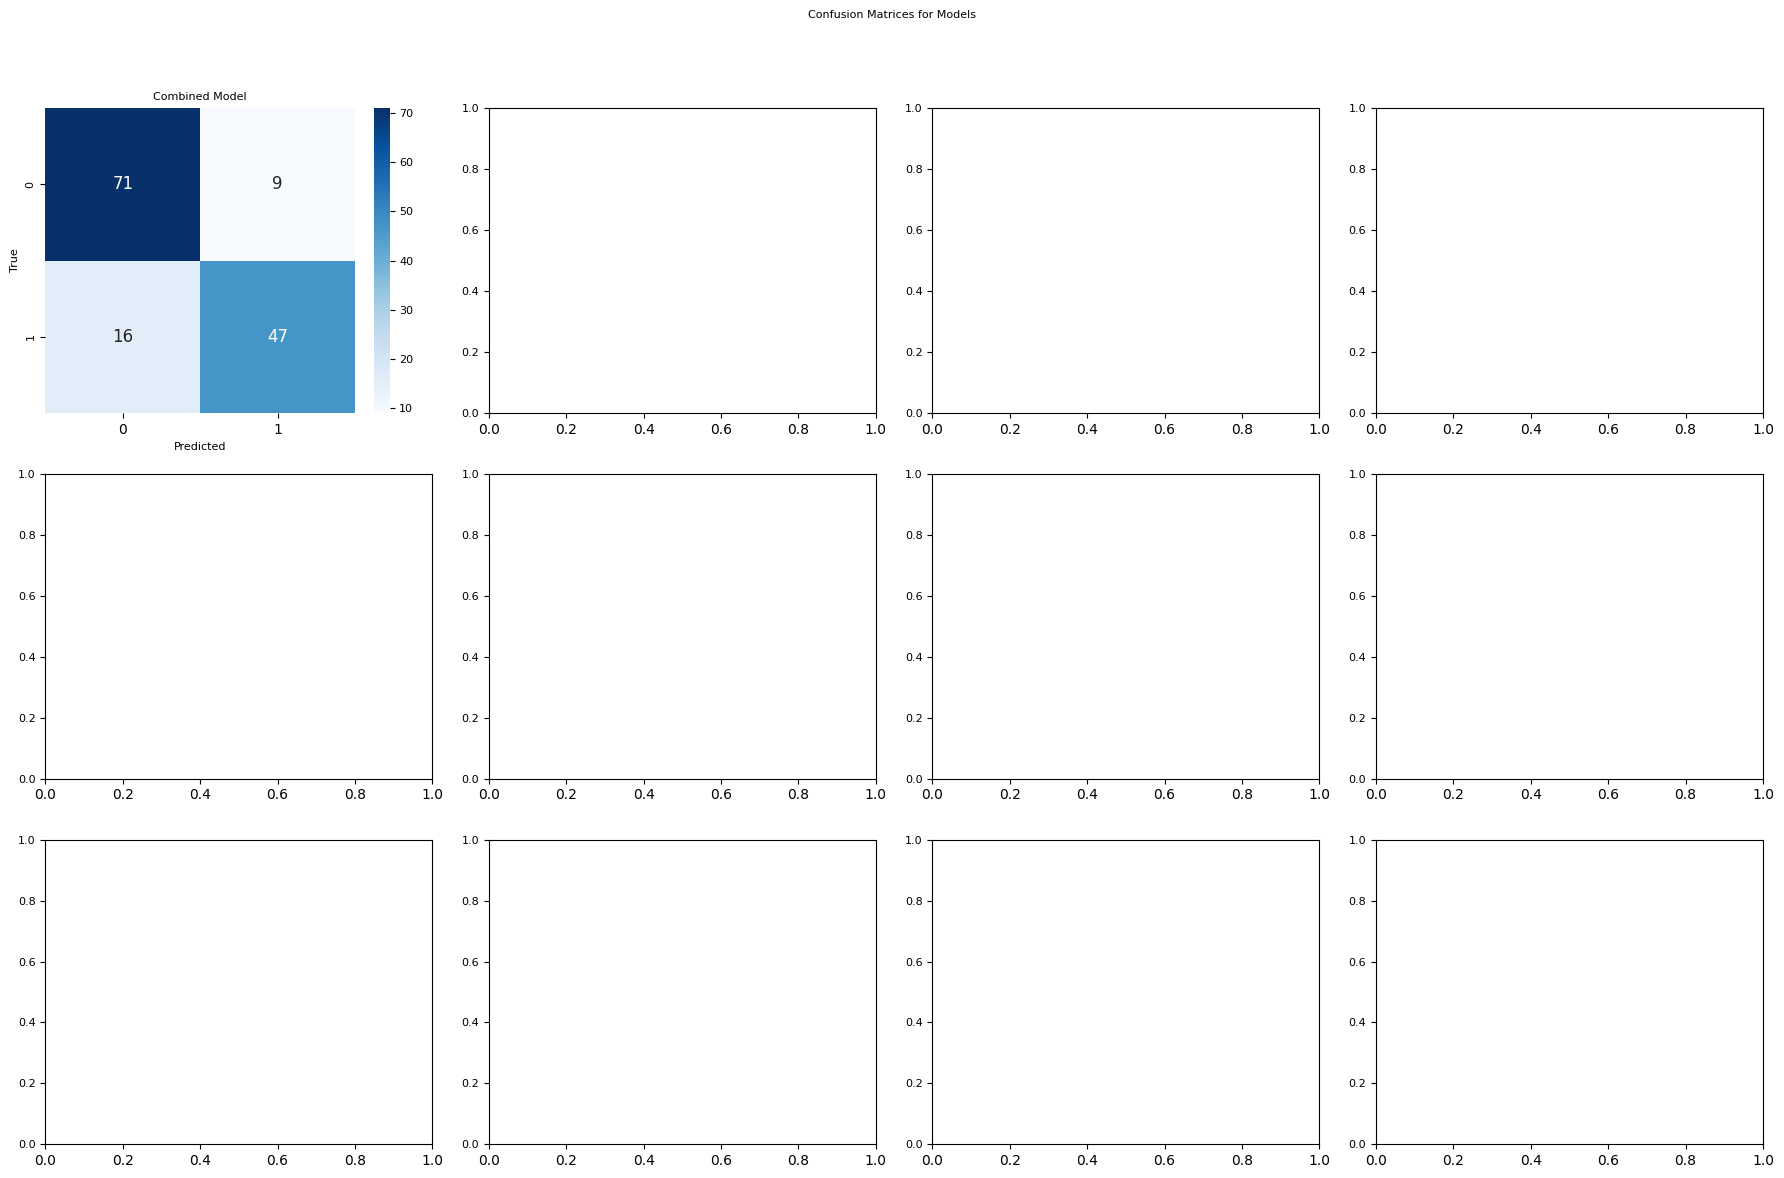

In [106]:
svm_model = SVC(probability = True)
knn_model = KNeighborsClassifier()


svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)


from sklearn.ensemble import VotingClassifier


#voting based on majority
voting_model = VotingClassifier(estimators = [
    ('svm', svm_model),
    ('knn', knn_model)
], voting = 'soft')  # 'soft' for probability-based voting

voting_model.fit(X_train, y_train)
final_predictions = voting_model.predict(X_test)




#voting based on weight
'''
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model)
], voting='soft', weights=[2, 1])  # Give SVM double weight

voting_model.fit(X_train, y_train)
final_predictions = voting_model.predict(X_test)
'''



from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
#metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Combined Model Accuracy:", accuracy)
print("Combined Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))


#update results
results['Combined Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


#visual
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Incredible model that uses SVC and Logistic Regression
Acc 0.846 and about 0.81 f1 score

Combined Model Accuracy: 0.8461538461538461
Combined Model F1 Score: 0.8103448275862069
Confusion Matrix:
[[74  6]
 [16 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        80
           1       0.89      0.75      0.81        63

    accuracy                           0.85       143
   macro avg       0.85      0.84      0.84       143
weighted avg       0.85      0.85      0.84       143



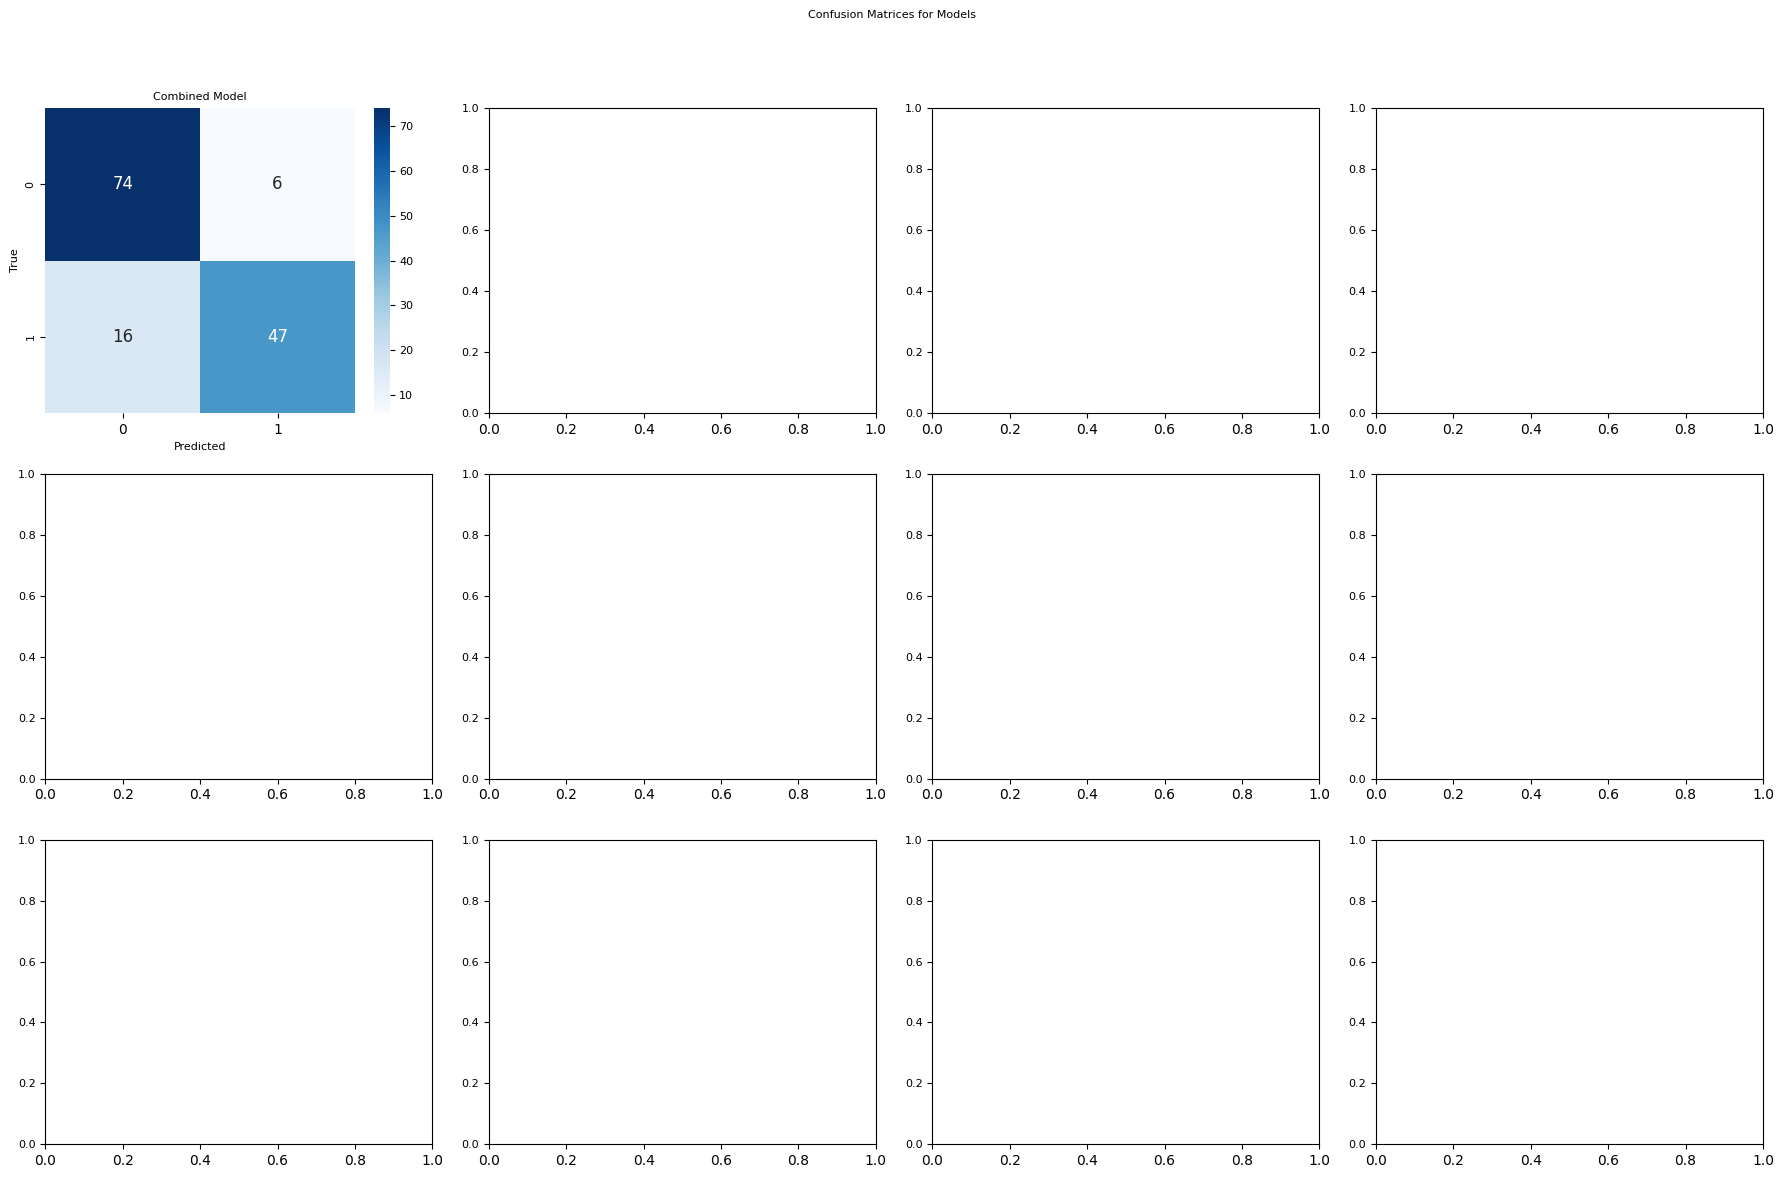

In [107]:
# Define your models
svm_model = SVC(probability=True)
logistic_model = LogisticRegression(max_iter=1000)
'''
# Load and prepare your data
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped_age_nan_rows['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
# Initialize models
svm_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)
logistic_predictions = logistic_model.predict(X_test)

# Combine models using VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('logistic', logistic_model)
], voting='soft')  # 'soft' for probability-based voting

voting_model.fit(X_train, y_train)
final_predictions = voting_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Combined Model Accuracy:", accuracy)
print("Combined Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results = {}
results['Combined Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}

# Visualize confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Adjust the grid size if needed
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Initial tests with many models and feature iterations

In [98]:
'''
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()  # Replace with your actual model
}

# Load and prepare your data
# This assumes you have your DataFrame `train_titanic_dropped_age_nan_rows` and `passenger_ids_test`

# Feature selection (no labels)

# WE ADDED EMBARKED, AND IT LOWERS THE SCORE
# quite possibly because at some point it tends to Use Southampton as a parameter of good survival correlation
#but it's not due to just merely have few people boarded it
'''
'''
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'AgeGroup'] #, 'Embarked',
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped_age_nan_rows['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
'''
# Create DataFrame for test set including PassengerId
df_test = X_test.copy()
df_test = pd.DataFrame(df_test, columns=features)  # Convert to DataFrame with feature names
df_test['PassengerId'] = passenger_ids_test.values
df_test['Actual'] = y_test.values

results = {}
false_positives_dict = {}
false_negatives_dict = {}

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Capture false positives and false negatives
    df_test['Predicted'] = y_pred
    false_positives = df_test[(df_test['Actual'] == 0) & (df_test['Predicted'] == 1)]
    false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

    false_positives_dict[name] = false_positives['PassengerId'].tolist()
    false_negatives_dict[name] = false_negatives['PassengerId'].tolist()

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted Survived')
    ax.set_ylabel('True Survived')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print out the PassengerIds of wrongly classified instances


for name in models.keys():
    print(f"\n{name} - False Positives:")
    print(sorted(false_positives_dict[name]))
    print(f"{name} - False Negatives:")
    print(sorted(false_negatives_dict[name]))
'''

'\n# Create DataFrame for test set including PassengerId\ndf_test = X_test.copy()\ndf_test = pd.DataFrame(df_test, columns=features)  # Convert to DataFrame with feature names\ndf_test[\'PassengerId\'] = passenger_ids_test.values\ndf_test[\'Actual\'] = y_test.values\n\nresults = {}\nfalse_positives_dict = {}\nfalse_negatives_dict = {}\n\nfor name, model in models.items():\n    print(f"\n\nTraining {name}...")\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n\n    # Metrics\n    accuracy = accuracy_score(y_test, y_pred)\n    f1 = f1_score(y_test, y_pred)\n    conf_matrix = confusion_matrix(y_test, y_pred)\n\n    # Classification report\n    print(f"Classification Report for {name}")\n    print(classification_report(y_test, y_pred))\n\n    results[name] = {\n        \'accuracy\': accuracy,\n        \'f1_score\': f1,\n        \'confusion_matrix\': conf_matrix,\n        \'classification_report\': classification_report(y_test, y_pred, output_dict=True)\n    }\n\n    pri

We wanted to know exactly where every model was failing, to understand relationship between models, errors, and possible biases or hardest rows to classify

In [108]:
def compare_errors(false_positives_dict, false_negatives_dict):
    all_models = list(false_positives_dict.keys())

    comparison_results = {
        'common_false_positives': {},
        'common_false_negatives': {},
        'unique_false_positives': {},
        'unique_false_negatives': {}
    }

    # Compare false positives
    for i, model1 in enumerate(all_models):
        for model2 in all_models[i + 1:]:
            common_fp = set(false_positives_dict[model1]).intersection(set(false_positives_dict[model2]))
            unique_fp_model1 = set(false_positives_dict[model1]).difference(set(false_positives_dict[model2]))
            unique_fp_model2 = set(false_positives_dict[model2]).difference(set(false_positives_dict[model1]))

            comparison_results['common_false_positives'][(model1, model2)] = common_fp
            comparison_results['unique_false_positives'][(model1, model2)] = (unique_fp_model1, unique_fp_model2)

    # Compare false negatives
    for i, model1 in enumerate(all_models):
        for model2 in all_models[i + 1:]:
            common_fn = set(false_negatives_dict[model1]).intersection(set(false_negatives_dict[model2]))
            unique_fn_model1 = set(false_negatives_dict[model1]).difference(set(false_negatives_dict[model2]))
            unique_fn_model2 = set(false_negatives_dict[model2]).difference(set(false_negatives_dict[model1]))

            comparison_results['common_false_negatives'][(model1, model2)] = common_fn
            comparison_results['unique_false_negatives'][(model1, model2)] = (unique_fn_model1, unique_fn_model2)

    return comparison_results


Model testing with Nan Age, won't Work

In [109]:
# WITH NAN AGE
#it was impossible to use NaN Age, the models cant support that
'''


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()  # Replace with your actual model
}

# Load and prepare your data
# This assumes you have your DataFrame `train_titanic_dropped_age_nan_rows` and `passenger_ids_test`

# Feature selection (no labels)
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = train_titanic_dropped[features]
y = train_titanic_dropped['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataFrame for test set including PassengerId
df_test = X_test.copy()
df_test = pd.DataFrame(df_test, columns=features)  # Convert to DataFrame with feature names
df_test['PassengerId'] = passenger_ids_test.values
df_test['Actual'] = y_test.values

results = {}
false_positives_dict = {}
false_negatives_dict = {}

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Capture false positives and false negatives
    df_test['Predicted'] = y_pred
    false_positives = df_test[(df_test['Actual'] == 0) & (df_test['Predicted'] == 1)]
    false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

    false_positives_dict[name] = false_positives['PassengerId'].tolist()
    false_negatives_dict[name] = false_negatives['PassengerId'].tolist()

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted Survived')
    ax.set_ylabel('True Survived')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print out the PassengerIds of wrongly classified instances
for name in models.keys():
    print(f"\n{name} - False Positives:")
    print(false_positives_dict[name])
    print(f"{name} - False Negatives:")
    print(false_negatives_dict[name])
'''

'\n\n\nmodels = {\n    \'Logistic Regression\': LogisticRegression(max_iter=1000),\n    \'Decision Tree\': DecisionTreeClassifier(),\n    \'Random Forest\': RandomForestClassifier(),\n    \'Support Vector Machine\': SVC(probability=True),\n    \'Naive Bayes\': GaussianNB(),\n    \'k-NN\': KNeighborsClassifier(),\n    \'Customized Model\': CustomizedModel()  # Replace with your actual model\n}\n\n# Load and prepare your data\n# This assumes you have your DataFrame `train_titanic_dropped_age_nan_rows` and `passenger_ids_test`\n\n# Feature selection (no labels)\nfeatures = [\'Sex\', \'Pclass\', \'Age\', \'Fare\', \'SibSp\', \'Parch\', \'Embarked\']\nX = train_titanic_dropped[features]\ny = train_titanic_dropped[\'Survived\']\n\n# Split the dataset into training and test sets\nX_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(\n    X, y, train_titanic_dropped[\'PassengerId\'], test_size=0.2, random_state=42)\n\n# Standardize features\nscaler = Sta

Error comparison between models



Training Logistic Regression...
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143

Logistic Regression Accuracy: 0.8042
Logistic Regression F1 Score: 0.7544


Training Decision Tree...
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        80
           1       0.67      0.59      0.63        63

    accuracy                           0.69       143
   macro avg       0.69      0.68      0.68       143
weighted avg       0.69      0.69      0.69       143

Decision Tree Accuracy: 0.6923
Decision Tree F1 Score: 0.6271


Training Random Forest...
Classification Report for Random F

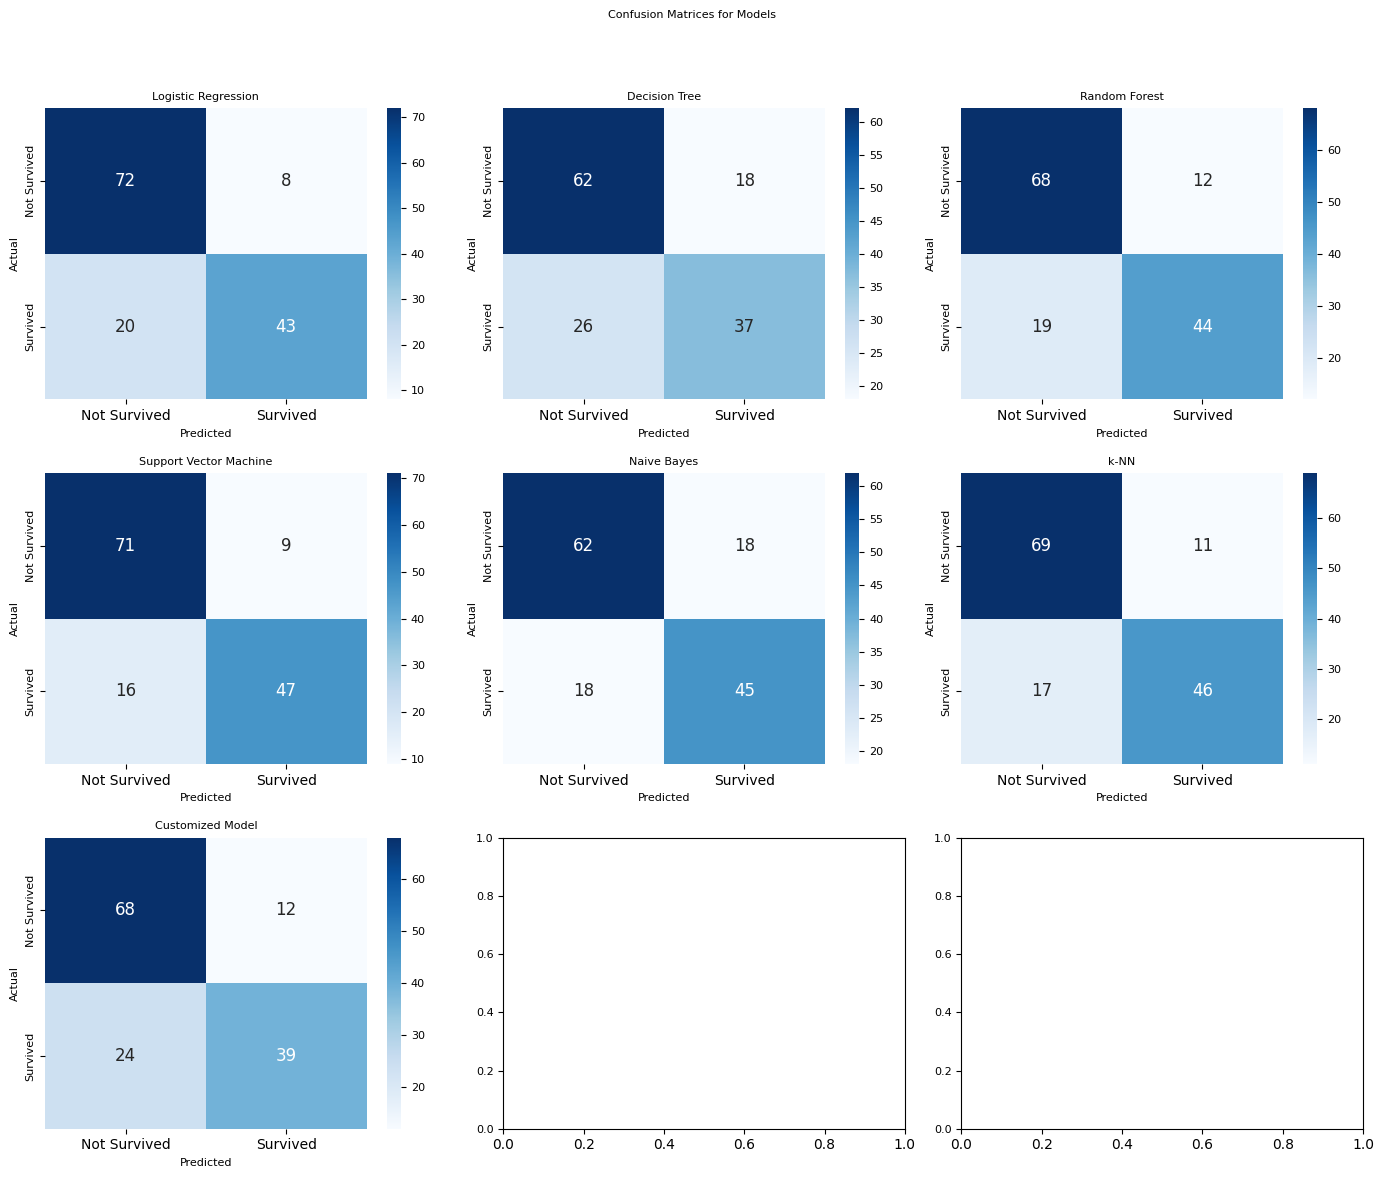


Logistic Regression - False Positives:
[101, 103, 298, 378, 475, 792, 853, 855]
Logistic Regression - False Negatives:
[75, 166, 184, 208, 227, 249, 262, 280, 284, 391, 408, 415, 454, 510, 511, 623, 674, 745, 752, 763]

Decision Tree - False Positives:
[8, 93, 101, 138, 201, 246, 255, 322, 356, 363, 435, 443, 658, 660, 732, 770, 853, 855]
Decision Tree - False Negatives:
[12, 57, 184, 196, 208, 209, 227, 262, 269, 276, 284, 367, 391, 415, 418, 480, 510, 511, 551, 623, 674, 680, 738, 745, 763, 828]

Random Forest - False Positives:
[93, 101, 138, 255, 298, 435, 443, 658, 732, 770, 853, 855]
Random Forest - False Negatives:
[12, 40, 208, 227, 249, 262, 284, 391, 415, 510, 511, 555, 623, 674, 680, 738, 745, 763, 781]

Support Vector Machine - False Positives:
[101, 255, 298, 363, 475, 658, 853, 855, 886]
Support Vector Machine - False Negatives:
[75, 208, 227, 249, 262, 280, 284, 391, 415, 454, 510, 511, 623, 674, 745, 763]

Naive Bayes - False Positives:
[41, 101, 103, 125, 168, 246, 25

In [116]:
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(),
    'Customized Model': CustomizedModel()  # Replace with your actual model
}

# Load and prepare your data
features = ['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
X = train_titanic_dropped_age_nan_rows[features]
y = train_titanic_dropped_age_nan_rows['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, passenger_ids_train, passenger_ids_test = train_test_split(
    X, y, train_titanic_dropped_age_nan_rows['PassengerId'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataFrame for test set including PassengerId
df_test = pd.DataFrame(X_test, columns=features)  # Convert to DataFrame with feature names
df_test['PassengerId'] = passenger_ids_test.values
df_test['Actual'] = y_test.values

results = {}
false_positives_dict = {}
false_negatives_dict = {}
false_positives_list = []
false_negatives_list = []

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification report
    print(f"Classification Report for {name}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Capture false positives and false negatives
    df_test['Predicted'] = y_pred
    false_positives = df_test[(df_test['Actual'] == 0) & (df_test['Predicted'] == 1)]
    false_negatives = df_test[(df_test['Actual'] == 1) & (df_test['Predicted'] == 0)]

    false_positives_dict[name] = false_positives['PassengerId'].tolist()
    false_negatives_dict[name] = false_negatives['PassengerId'].tolist()

    # Append to the list
    for _, row in false_positives.iterrows():
        false_positives_list.append({
            'Model': name,
            'Type': 'False Positive',
            'PassengerId': row['PassengerId'],
            **row[features].to_dict()  # Add feature columns
        })

    for _, row in false_negatives.iterrows():
        false_negatives_list.append({
            'Model': name,
            'Type': 'False Negative',
            'PassengerId': row['PassengerId'],
            **row[features].to_dict()  # Add feature columns
        })

# Combine lists into a DataFrame
false_predictions_df = pd.DataFrame(false_positives_list + false_negatives_list)

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Models')

for ax, (name, result) in zip(axes.flatten(), results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print out the PassengerIds of wrongly classified instances
for name in models.keys():
    print(f"\n{name} - False Positives:")
    print(sorted(false_positives_dict[name]))
    print(f"{name} - False Negatives:")
    print(sorted(false_negatives_dict[name]))

# Display the DataFrame with false positives and false negatives
print("\nFalse Positives and False Negatives DataFrame:")
print(false_predictions_df.head())


Which were the false predictions?

In [117]:
false_predictions_df

Model            Type  PassengerId       Sex    Pclass  \
0    Logistic Regression  False Positive        853.0  1.317413  0.912372   
1    Logistic Regression  False Positive        298.0  1.317413 -1.491052   
2    Logistic Regression  False Positive        101.0  1.317413  0.912372   
3    Logistic Regression  False Positive        378.0 -0.759063 -1.491052   
4    Logistic Regression  False Positive        103.0 -0.759063 -1.491052   
..                   ...             ...          ...       ...       ...   
223     Customized Model  False Negative        738.0 -0.759063 -1.491052   
224     Customized Model  False Negative        208.0 -0.759063  0.912372   
225     Customized Model  False Negative        674.0 -0.759063 -0.289340   
226     Customized Model  False Negative        166.0 -0.759063  0.912372   
227     Customized Model  False Negative         75.0 -0.759063  0.912372   

          Age       Fare     SibSp     Parch  Embarked  AgeGroup  
0   -1.451250  -0.360831  0.521335  0.705651  1.549879  1.665507  
1   -1.944824   2.565366  0.521335  1.893565 -0.477434  1.665507  
2   -0.111549  -0.518622 -0.549566 -0.482264 -0.477434 -0.895773  
3   -0.182060   3.852382 -0.549566  1.893565  1.549879 -0.895773  
4   -0.605123   0.971089 -0.549566  0.705651 -0.477434 -0.895773  
..        ...        ...       ...       ...       ...       ...  
223  0.382025  10.310626 -0.549566 -0.482264  1.549879 -0.042013  
224 -0.252570  -0.284798 -0.549566 -0.482264  1.549879 -0.895773  
225  0.099982  -0.409045 -0.549566 -0.482264 -0.477434 -0.042013  
226 -1.451250  -0.247497 -0.549566  1.893565 -0.477434  1.665507  
227  0.170493   0.524729 -0.549566 -0.482264 -0.477434 -0.042013  

[228 rows x 11 columns]

In [118]:
# Export to CSV
csv_file_path = 'sample_data/false_predictions.csv'  # Define your path here
false_predictions_df.to_csv(csv_file_path, index=False)


Stacking calssifier test, not useful

In [113]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svm', SVC(probability=True)),
    ('logistic', LogisticRegression(max_iter=1000))
]

# Define the meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create the StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation for the meta-model
)

# Train and evaluate the stacking model
stacking_model.fit(X_train, y_train)
final_predictions = stacking_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Stacking Model Accuracy:", accuracy)
print("Stacking Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results['Stacking Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


Stacking Model Accuracy: 0.8391608391608392
Stacking Model F1 Score: 0.8034188034188035
Confusion Matrix:
[[73  7]
 [16 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        80
           1       0.87      0.75      0.80        63

    accuracy                           0.84       143
   macro avg       0.85      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143



In [114]:
# Split the data into training and validation sets
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train base models
svm_model.fit(X_train_base, y_train_base)
logistic_model.fit(X_train_base, y_train_base)

# Generate base predictions
svm_val_preds = svm_model.predict_proba(X_val_base)[:, 1]
logistic_val_preds = logistic_model.predict_proba(X_val_base)[:, 1]

# Stack predictions for the meta-model
X_meta = np.column_stack((svm_val_preds, logistic_val_preds))

# Train the meta-model
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(X_meta, y_val_base)

# Generate test set predictions
svm_test_preds = svm_model.predict_proba(X_test)[:, 1]
logistic_test_preds = logistic_model.predict_proba(X_test)[:, 1]
X_meta_test = np.column_stack((svm_test_preds, logistic_test_preds))

# Predict using the meta-model
final_predictions = meta_model.predict(X_meta_test)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Blending Model Accuracy:", accuracy)
print("Blending Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results['Blending Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


Blending Model Accuracy: 0.8251748251748252
Blending Model F1 Score: 0.7826086956521738
Confusion Matrix:
[[73  7]
 [18 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        80
           1       0.87      0.71      0.78        63

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.82       143



In [115]:
# Train the first model
svm_model.fit(X_train, y_train)

# Generate predictions from the first model
svm_train_preds = svm_model.predict_proba(X_train)[:, 1]
svm_test_preds = svm_model.predict_proba(X_test)[:, 1]

# Augment the training and test datasets
X_train_aug = np.column_stack((X_train, svm_train_preds))
X_test_aug = np.column_stack((X_test, svm_test_preds))

# Train the second model on the augmented dataset
logistic_model.fit(X_train_aug, y_train)
final_predictions = logistic_model.predict(X_test_aug)

# Metrics
accuracy = accuracy_score(y_test, final_predictions)
f1 = f1_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Feature Augmentation Model Accuracy:", accuracy)
print("Feature Augmentation Model F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Update results
results['Feature Augmentation Model'] = {
    'accuracy': accuracy,
    'f1_score': f1,
    'confusion_matrix': conf_matrix,
    'classification_report': classification_report(y_test, final_predictions, output_dict=True)
}


Feature Augmentation Model Accuracy: 0.8391608391608392
Feature Augmentation Model F1 Score: 0.7964601769911505
Confusion Matrix:
[[75  5]
 [18 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        80
           1       0.90      0.71      0.80        63

    accuracy                           0.84       143
   macro avg       0.85      0.83      0.83       143
weighted avg       0.85      0.84      0.84       143

